In [18]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import qgrid
import seaborn as sns
import calendar
import plotly.graph_objects as go

In [19]:
product_data = pd.read_csv("C:\\Users\\Yilin\\Desktop\\Wayfair\\Wayfair_Analysis_Report_1\\Product_Report_2.csv")
pattern_data = pd.read_excel('C:\\Users\\Yilin\\Desktop\\Wayfair\\Wayfair_Catalog.xlsx')

## Product Data

In [20]:
product_data.head()

,Campaign ID,Sku,Start Date,End Date,Supplier Part Numbers,Product Name,Store,Class,Status,Impressions,Clicks,Avg. Daily Spend,Attributed Sales,Attributed Orders,ROAS (%),CPC,CTR (%),Total Spend
0,4053,ANDO5748,1/2/2019,1/31/2019,"548900, 548902, 548902L, 548903, 548904, 54890...",Devon Wine/Beige Border Area Rug,wayfair.com,Area Rugs,INACTIVE,1161,15,0.1691,0.00,0,0.000000,0.26,1.29,3.89
1,6543,ANDO5748,2/1/2019,3/31/2019,"548900, 548902, 548902L, 548903, 548904, 54890...",Devon Wine/Beige Border Area Rug,wayfair.com,Area Rugs,INACTIVE,2,0,0.0000,0.00,0,0.000000,0.00,0.00,0.00
2,9052,ANDO5748,4/4/2019,10/7/2019,"548900, 548902, 548902L, 548903, 548904, 54890...",Devon Wine/Beige Border Area Rug,wayfair.com,Area Rugs,INACTIVE,1013,7,0.5000,0.00,0,0.000000,0.43,0.69,3.00
3,4053,ASTG5537,1/2/2019,1/31/2019,"36402, 36402L, 36403, 36404, 36405, 36406, 364...",Colindale Red/Beige Area Rug,wayfair.com,Area Rugs,ACTIVE,1971,36,0.3953,162.98,2,1374.198988,0.33,1.83,11.86
4,6543,ASTG5537,2/1/2019,3/31/2019,"36402, 36402L, 36403, 36404, 36405, 36406, 364...",Colindale Red/Beige Area Rug,wayfair.com,Area Rugs,ACTIVE,1732,24,0.1769,0.00,0,0.000000,0.41,1.39,9.91


In [21]:
product_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 18 columns):
Campaign ID              668 non-null int64
Sku                      668 non-null object
Start Date               668 non-null object
End Date                 668 non-null object
Supplier Part Numbers    668 non-null object
Product Name             668 non-null object
Store                    668 non-null object
Class                    668 non-null object
Status                   668 non-null object
Impressions              668 non-null int64
Clicks                   668 non-null int64
Avg. Daily Spend         668 non-null float64
Attributed Sales         668 non-null float64
Attributed Orders        668 non-null int64
ROAS (%)                 668 non-null float64
CPC                      668 non-null float64
CTR (%)                  668 non-null float64
Total Spend              668 non-null float64
dtypes: float64(6), int64(4), object(8)
memory usage: 94.1+ KB


In [22]:
product_data = product_data.drop(['Store','Class','Status','Supplier Part Numbers'],axis = 1)

In [23]:
product_data.head()

,Campaign ID,Sku,Start Date,End Date,Product Name,Impressions,Clicks,Avg. Daily Spend,Attributed Sales,Attributed Orders,ROAS (%),CPC,CTR (%),Total Spend
0,4053,ANDO5748,1/2/2019,1/31/2019,Devon Wine/Beige Border Area Rug,1161,15,0.1691,0.00,0,0.000000,0.26,1.29,3.89
1,6543,ANDO5748,2/1/2019,3/31/2019,Devon Wine/Beige Border Area Rug,2,0,0.0000,0.00,0,0.000000,0.00,0.00,0.00
2,9052,ANDO5748,4/4/2019,10/7/2019,Devon Wine/Beige Border Area Rug,1013,7,0.5000,0.00,0,0.000000,0.43,0.69,3.00
3,4053,ASTG5537,1/2/2019,1/31/2019,Colindale Red/Beige Area Rug,1971,36,0.3953,162.98,2,1374.198988,0.33,1.83,11.86
4,6543,ASTG5537,2/1/2019,3/31/2019,Colindale Red/Beige Area Rug,1732,24,0.1769,0.00,0,0.000000,0.41,1.39,9.91


In [24]:
product_data['Product Name'].value_counts(ascending = False)

Abramowitz Blue Area Rug                                                          6
Brooksville Multi Area Rug                                                        6
Juliana Cannes Medallion Ivory/Blue/Yellow Area Rug                               6
Gehl Modern Brown Arcs & Shapes Area Rug                                          6
Brooksville Red/Orange/Yellow Area Rug                                            5
                                                                                 ..
Cabana Celosia Moroccan Blue/White Area Rug                                       1
Ruby Tamara Mid-Century Modern Abstract Geometric Teal Blue/Gray/Gold Area Rug    1
Dazzle Disa Medallion Gold Area Rug                                               1
Good Vibes Helena Modern Geometric Blush Pink/Gray Area Rug                       1
Madison Shag Piper Solid Dark Gray Area Rug                                       1
Name: Product Name, Length: 394, dtype: int64

## Pattern Data

In [25]:
pattern_data.columns.values

array(['Wayfair SKU', 'Well Woven SKU', 'Manufacturer Name',
       'Product Name', 'Collection Name', 'Size', 'Primary Pattern',
       'Well Woven Color'], dtype=object)

In [26]:
pattern_data_2 = pattern_data.drop(columns = ['Well Woven SKU','Size']).drop_duplicates()
pattern_data_2

,Wayfair SKU,Manufacturer Name,Product Name,Collection Name,Primary Pattern,Well Woven Color
0,INFT1057,Well Woven,Kings Court Gold Leopard Print Area Rug,Kings Court,Unavailable,Brown
8,VVRE5054,Viv + Rae,Helwig Daisy Floral Kids Blue Area Rug,Helwig,Unavailable,Blue
10,VVRO6574,Viv + Rae,Juliet Bright Kids Pink Area Rug,Juliet,Unavailable,Pink
12,XTBS1246,Well Woven,Starbright Daisy Butterflies Kids Modern Pink ...,Starbright,Unavailable,Pink
13,VVRO6575,Viv + Rae,Juliet Calipso Pink Bright Kids Area Rug,Juliet,Unavailable,Pink
...,...,...,...,...,...,...
4665,XTBS1051,Hashtag Home,Coppola Ivory Area Rug,Coppola,Geometric,Ivory
4666,ZIPC6189,Ebern Designs,Fenwick Gray Area Rug,Fenwick,Abstract,Grey & Red
4667,ZIPC6211,Ebern Designs,Bellavia Blue Area Rug,Bellavia,Striped,Blue
4668,ZPCD2028,Ebern Designs,Bellair Ivory Arcs and Shapes Area Rug,Bellair,Abstract,Ivory


## Final_data

In [27]:
final_data = product_data.merge(pattern_data_2, left_on='Sku', right_on='Wayfair SKU', how='left')
final_data['Shop Classification'] = final_data['Wayfair SKU'].str[:4]
final_data.head(4)

,Campaign ID,Sku,Start Date,End Date,Product Name_x,Impressions,Clicks,Avg. Daily Spend,Attributed Sales,Attributed Orders,...,CPC,CTR (%),Total Spend,Wayfair SKU,Manufacturer Name,Product Name_y,Collection Name,Primary Pattern,Well Woven Color,Shop Classification
0,4053,ANDO5748,1/2/2019,1/31/2019,Devon Wine/Beige Border Area Rug,1161,15,0.1691,0.00,0,...,0.26,1.29,3.89,ANDO5748,Andover Mills,Devon Wine/Beige Border Area Rug,Devon,Geometric,Red,ANDO
1,6543,ANDO5748,2/1/2019,3/31/2019,Devon Wine/Beige Border Area Rug,2,0,0.0000,0.00,0,...,0.00,0.00,0.00,ANDO5748,Andover Mills,Devon Wine/Beige Border Area Rug,Devon,Geometric,Red,ANDO
2,9052,ANDO5748,4/4/2019,10/7/2019,Devon Wine/Beige Border Area Rug,1013,7,0.5000,0.00,0,...,0.43,0.69,3.00,ANDO5748,Andover Mills,Devon Wine/Beige Border Area Rug,Devon,Geometric,Red,ANDO
3,4053,ASTG5537,1/2/2019,1/31/2019,Colindale Red/Beige Area Rug,1971,36,0.3953,162.98,2,...,0.33,1.83,11.86,ASTG5537,Astoria Grand,Colindale Red/Beige Area Rug,Colindale,Oriental,Red,ASTG


In [28]:
final_data['Start Date'] = pd.to_datetime(final_data['Start Date'])
final_data['End Date'] = pd.to_datetime(final_data['End Date'])

final_data['Period_Week'] =  final_data['End Date'] - final_data['Start Date']
final_data['Period_Week'] = (final_data['Period_Week']/np.timedelta64(1,'W')).astype('int64')
d = dict(enumerate(calendar.month_abbr))
final_data['Start_Month'] = final_data['Start Date'].dt.month.map(d)

In [29]:
final_data

,Campaign ID,Sku,Start Date,End Date,Product Name_x,Impressions,Clicks,Avg. Daily Spend,Attributed Sales,Attributed Orders,...,Total Spend,Wayfair SKU,Manufacturer Name,Product Name_y,Collection Name,Primary Pattern,Well Woven Color,Shop Classification,Period_Week,Start_Month
0,4053,ANDO5748,2019-01-02,2019-01-31,Devon Wine/Beige Border Area Rug,1161,15,0.1691,0.00,0,...,3.89,ANDO5748,Andover Mills,Devon Wine/Beige Border Area Rug,Devon,Geometric,Red,ANDO,4,Jan
1,6543,ANDO5748,2019-02-01,2019-03-31,Devon Wine/Beige Border Area Rug,2,0,0.0000,0.00,0,...,0.00,ANDO5748,Andover Mills,Devon Wine/Beige Border Area Rug,Devon,Geometric,Red,ANDO,8,Feb
2,9052,ANDO5748,2019-04-04,2019-10-07,Devon Wine/Beige Border Area Rug,1013,7,0.5000,0.00,0,...,3.00,ANDO5748,Andover Mills,Devon Wine/Beige Border Area Rug,Devon,Geometric,Red,ANDO,26,Apr
3,4053,ASTG5537,2019-01-02,2019-01-31,Colindale Red/Beige Area Rug,1971,36,0.3953,162.98,2,...,11.86,ASTG5537,Astoria Grand,Colindale Red/Beige Area Rug,Colindale,Oriental,Red,ASTG,4,Jan
4,6543,ASTG5537,2019-02-01,2019-03-31,Colindale Red/Beige Area Rug,1732,24,0.1769,0.00,0,...,9.91,ASTG5537,Astoria Grand,Colindale Red/Beige Area Rug,Colindale,Oriental,Red,ASTG,8,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,4049,ZPCD6981,2019-01-02,2019-01-31,Gehl Modern Brown Arcs & Shapes Area Rug,862,13,0.1414,187.44,2,...,3.96,ZPCD6981,Zipcode Design,Gehl Modern Brown Arcs & Shapes Area Rug,Gehl,Unavailable,Light Blue,ZPCD,4,Jan
667,6542,ZPCD6981,2019-02-01,2019-03-31,Gehl Modern Brown Arcs & Shapes Area Rug,287,9,0.1018,0.00,0,...,3.87,ZPCD6981,Zipcode Design,Gehl Modern Brown Arcs & Shapes Area Rug,Gehl,Unavailable,Light Blue,ZPCD,8,Feb
668,9054,ZPCD6981,2019-04-04,2019-10-07,Gehl Modern Brown Arcs & Shapes Area Rug,403853,3633,13.2775,10243.92,117,...,2257.19,ZPCD6981,Zipcode Design,Gehl Modern Brown Arcs & Shapes Area Rug,Gehl,Unavailable,Light Blue,ZPCD,26,Apr
669,16152,ZPCD6981,2019-08-16,2019-08-29,Gehl Modern Brown Arcs & Shapes Area Rug,83872,672,144.0050,1150.85,12,...,864.03,ZPCD6981,Zipcode Design,Gehl Modern Brown Arcs & Shapes Area Rug,Gehl,Unavailable,Light Blue,ZPCD,1,Aug


In [30]:
final_data = final_data[['Campaign ID',
 'Wayfair SKU',
 'Shop Classification',
 'Product Name_x',
 'Manufacturer Name',
 'Collection Name',
 'Primary Pattern',
 'Well Woven Color',
 'Start Date',
 'End Date',
 'Start_Month',
 'Period_Week',
 'Impressions',
 'Clicks',
 'Avg. Daily Spend',
 'Attributed Sales',
 'Attributed Orders',
 'ROAS (%)',
 'CPC',
 'CTR (%)',
 'Total Spend']]

In [31]:
final_data_2 = final_data.loc[final_data.index != 0]
final_data_2.rename(columns={'Product Name_x':'Product Name'},inplace = True)
final_data_2.head()

,Campaign ID,Wayfair SKU,Shop Classification,Product Name,Manufacturer Name,Collection Name,Primary Pattern,Well Woven Color,Start Date,End Date,...,Period_Week,Impressions,Clicks,Avg. Daily Spend,Attributed Sales,Attributed Orders,ROAS (%),CPC,CTR (%),Total Spend
1,6543,ANDO5748,ANDO,Devon Wine/Beige Border Area Rug,Andover Mills,Devon,Geometric,Red,2019-02-01,2019-03-31,...,8,2,0,0.0000,0.00,0,0.000000,0.00,0.00,0.00
2,9052,ANDO5748,ANDO,Devon Wine/Beige Border Area Rug,Andover Mills,Devon,Geometric,Red,2019-04-04,2019-10-07,...,26,1013,7,0.5000,0.00,0,0.000000,0.43,0.69,3.00
3,4053,ASTG5537,ASTG,Colindale Red/Beige Area Rug,Astoria Grand,Colindale,Oriental,Red,2019-01-02,2019-01-31,...,4,1971,36,0.3953,162.98,2,1374.198988,0.33,1.83,11.86
4,6543,ASTG5537,ASTG,Colindale Red/Beige Area Rug,Astoria Grand,Colindale,Oriental,Red,2019-02-01,2019-03-31,...,8,1732,24,0.1769,0.00,0,0.000000,0.41,1.39,9.91
5,9052,ASTG5537,ASTG,Colindale Red/Beige Area Rug,Astoria Grand,Colindale,Oriental,Red,2019-04-04,2019-10-07,...,26,1003075,3198,15.2336,6218.36,55,279.587432,0.70,0.32,2224.12


In [32]:
final_data_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 670 entries, 1 to 670
Data columns (total 21 columns):
Campaign ID            670 non-null int64
Wayfair SKU            656 non-null object
Shop Classification    656 non-null object
Product Name           670 non-null object
Manufacturer Name      656 non-null object
Collection Name        640 non-null object
Primary Pattern        656 non-null object
Well Woven Color       656 non-null object
Start Date             670 non-null datetime64[ns]
End Date               670 non-null datetime64[ns]
Start_Month            670 non-null object
Period_Week            670 non-null int64
Impressions            670 non-null int64
Clicks                 670 non-null int64
Avg. Daily Spend       670 non-null float64
Attributed Sales       670 non-null float64
Attributed Orders      670 non-null int64
ROAS (%)               670 non-null float64
CPC                    670 non-null float64
CTR (%)                670 non-null float64
Total Spend        

## Data Categories

#### Numerical Data

In [33]:
list(set(final_data_2.dtypes.tolist()))

[dtype('float64'), dtype('<M8[ns]'), dtype('int64'), dtype('O')]

In [34]:
product_data_num = final_data_2.select_dtypes(include = ['int64','float64']).drop(columns = 'Campaign ID').drop(columns = 'Period_Week')
product_data_num.head()

,Impressions,Clicks,Avg. Daily Spend,Attributed Sales,Attributed Orders,ROAS (%),CPC,CTR (%),Total Spend
1,2,0,0.0000,0.00,0,0.000000,0.00,0.00,0.00
2,1013,7,0.5000,0.00,0,0.000000,0.43,0.69,3.00
3,1971,36,0.3953,162.98,2,1374.198988,0.33,1.83,11.86
4,1732,24,0.1769,0.00,0,0.000000,0.41,1.39,9.91
5,1003075,3198,15.2336,6218.36,55,279.587432,0.70,0.32,2224.12


#### Categorical Data

In [35]:
product_data_cat = final_data_2.select_dtypes(include = 'O').drop(columns = 'Start_Month')
product_data_cat.head()

,Wayfair SKU,Shop Classification,Product Name,Manufacturer Name,Collection Name,Primary Pattern,Well Woven Color
1,ANDO5748,ANDO,Devon Wine/Beige Border Area Rug,Andover Mills,Devon,Geometric,Red
2,ANDO5748,ANDO,Devon Wine/Beige Border Area Rug,Andover Mills,Devon,Geometric,Red
3,ASTG5537,ASTG,Colindale Red/Beige Area Rug,Astoria Grand,Colindale,Oriental,Red
4,ASTG5537,ASTG,Colindale Red/Beige Area Rug,Astoria Grand,Colindale,Oriental,Red
5,ASTG5537,ASTG,Colindale Red/Beige Area Rug,Astoria Grand,Colindale,Oriental,Red


In [36]:
product_data_time = final_data_2.select_dtypes(include = ['<M8[ns]','<m8[ns]'])
product_data_time['Start_Month'] = final_data_2['Start_Month']
product_data_time['Period_Week'] = final_data_2['Period_Week']
product_data_time.head()

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Yilin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Start Date,End Date,Start_Month,Period_Week
1,2019-02-01,2019-03-31,Feb,8
2,2019-04-04,2019-10-07,Apr,26
3,2019-01-02,2019-01-31,Jan,4
4,2019-02-01,2019-03-31,Feb,8
5,2019-04-04,2019-10-07,Apr,26


## Data Exploration

#### Numerical Data Distribution

In [1]:
product_data_num.hist(figsize=(7, 10), bins=50, xlabelsize=5, ylabelsize=8)

NameError: name 'product_data_num' is not defined

#### The relationship between Total Spend, CTR (%) and ROAS (%).

##### Total Spend

In [38]:
product_data_TS = product_data_num[['CTR (%)','Total Spend','ROAS (%)','Impressions']]
product_data_TS.head(2)

,CTR (%),Total Spend,ROAS (%),Impressions
1,0.00,0.0,0.0,2
2,0.69,3.0,0.0,1013


In [39]:
product_data_TS.corr()

,CTR (%),Total Spend,ROAS (%),Impressions
CTR (%),1.000000,-0.070500,0.034134,-0.091392
Total Spend,-0.070500,1.000000,-0.029656,0.907290
ROAS (%),0.034134,-0.029656,1.000000,-0.025841
Impressions,-0.091392,0.907290,-0.025841,1.000000


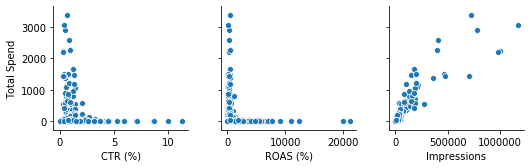

In [40]:
for i in range(0, len(product_data_TS.columns), 4):
    sns.pairplot(data=product_data_TS,
                x_vars=product_data_TS.drop(columns = ['Total Spend']).columns[i:i+4],
                y_vars=['Total Spend'])

#### Numerical data (biding price)

In [41]:
Campaign_ID_CPC_ROAS = final_data_2[['CPC','ROAS (%)']]
Campaign_ID_CPC_ROAS = Campaign_ID_CPC_ROAS.groupby('CPC').mean().reset_index()
Campaign_ID_CPC_ROAS.head(2)

,CPC,ROAS (%)
0,0.00,0.000000
1,0.21,145.463362


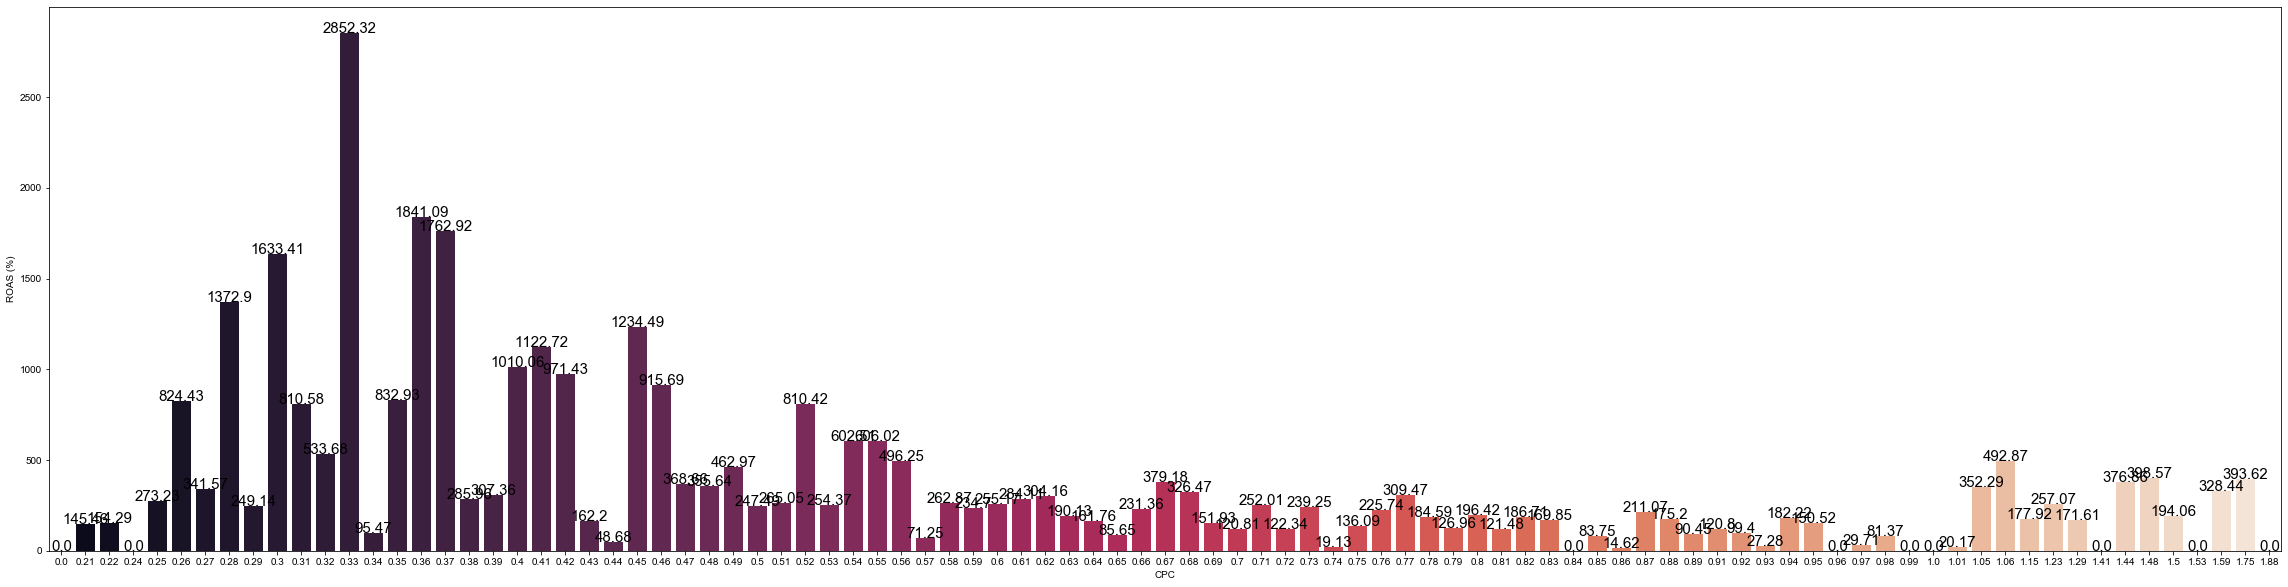

In [42]:
f, axes = plt.subplots(1,sharey=True, figsize=(40, 10))
g= sns.barplot(x='CPC', y='ROAS (%)', data=Campaign_ID_CPC_ROAS,palette="rocket")
sns.set(style="whitegrid")
for index, row in Campaign_ID_CPC_ROAS.iterrows():
    g.text(row.name,row['ROAS (%)'], round(row['ROAS (%)'],2), color='black', ha="center",fontsize=15)

In [43]:
CPC_count = final_data_2[['Campaign ID','CPC']]
CPC_count = CPC_count.groupby('CPC').count().reset_index().rename(columns = {'Campaign ID':'Count'})
CPC_count.head()

,CPC,Count
0,0.00,59
1,0.21,2
2,0.22,2
3,0.24,1
4,0.25,11


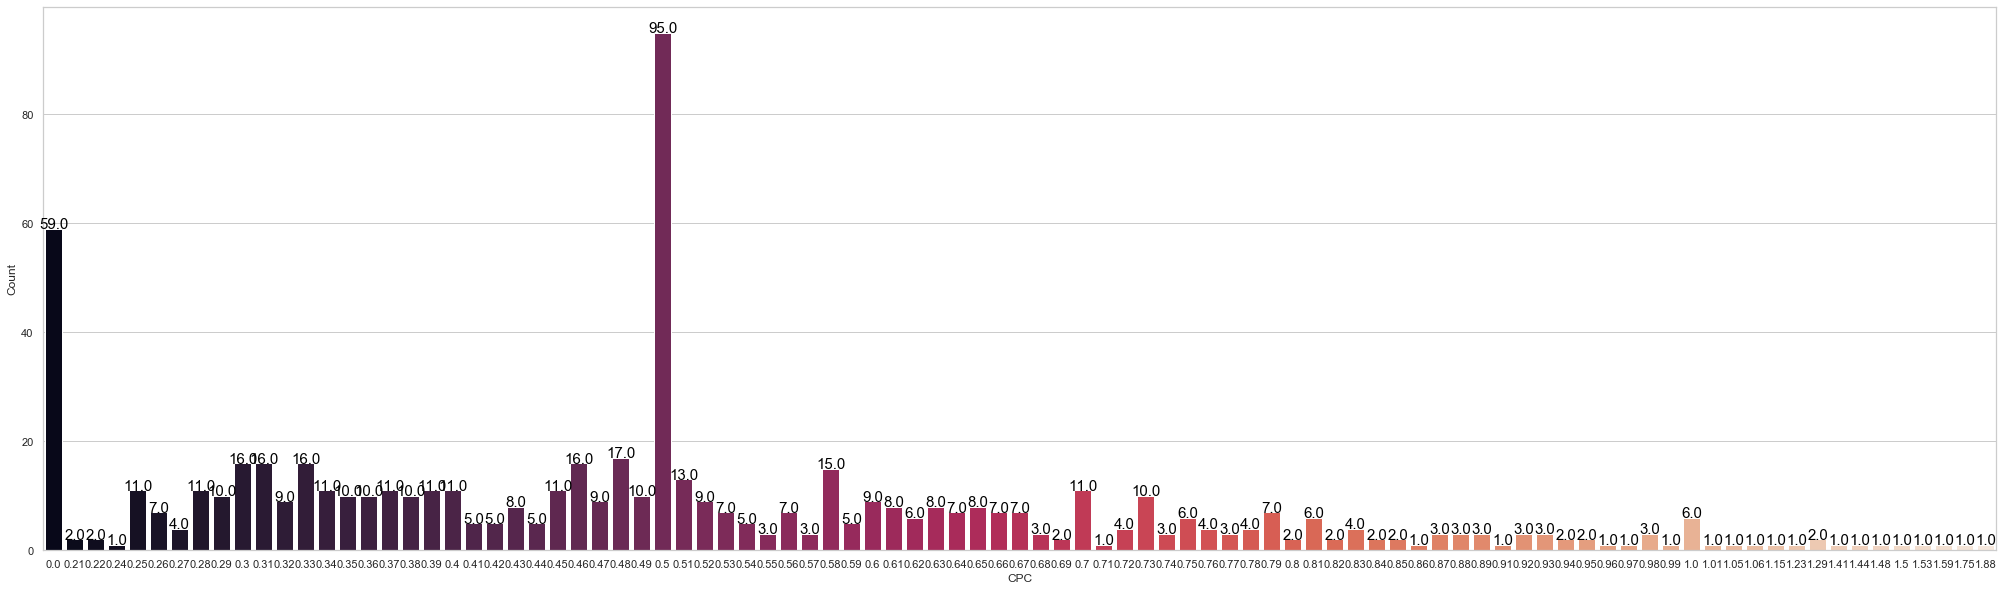

In [44]:
f, axes = plt.subplots(1,sharey=True, figsize=(35, 10))
g= sns.barplot(x='CPC', y='Count', data=CPC_count,palette="rocket")
sns.set(style="whitegrid")
for index, row in CPC_count.iterrows():
    g.text(row.name,row['Count'], round(row['Count'],2), color='black', ha="center",fontsize=15)

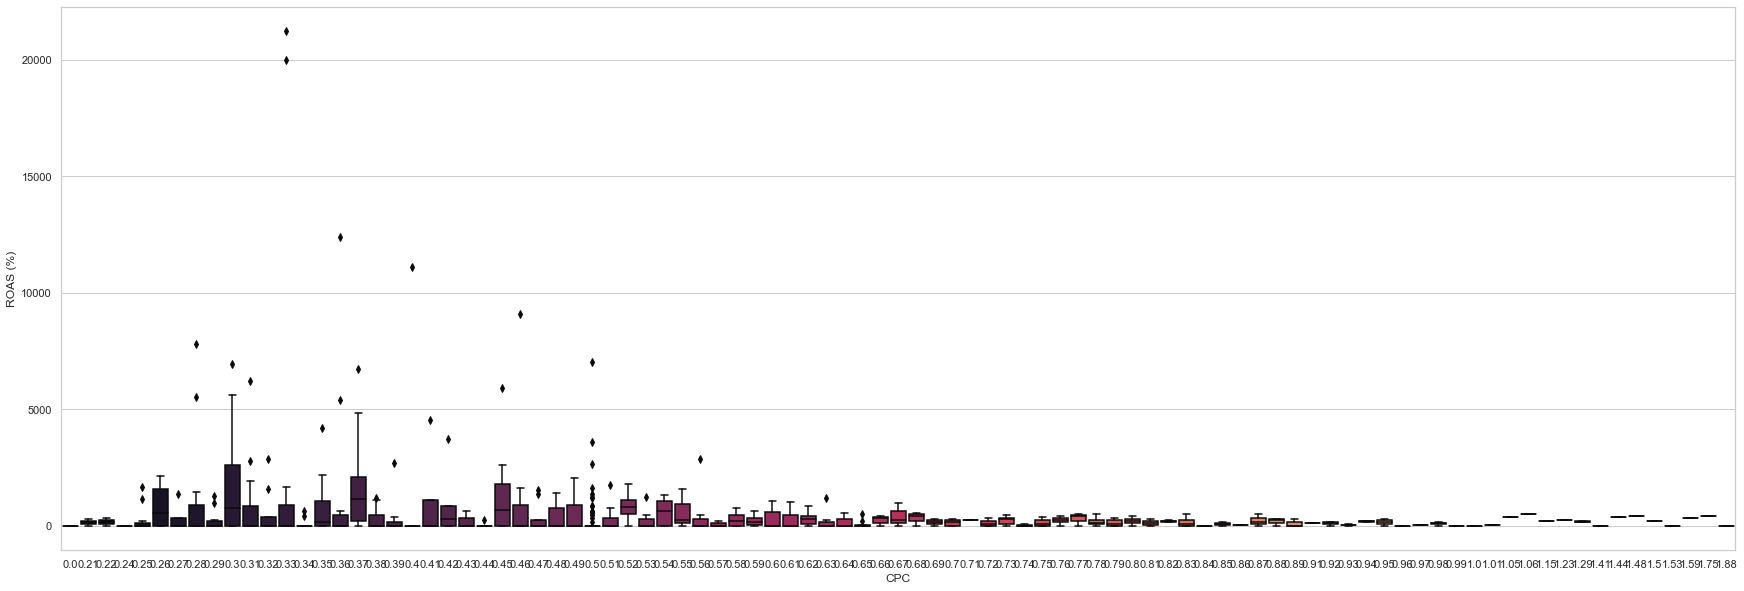

In [45]:
f, axes = plt.subplots(1,sharey=True, figsize=(30, 10))
g= sns.boxplot(x='CPC', y='ROAS (%)', data=final_data_2,palette="rocket")
sns.set(style="whitegrid")

#### Categorical Data Distribution - Shop Classification

In [46]:
ROAS_data_SC_spend = final_data_2[['Total Spend','Shop Classification']].groupby('Shop Classification').sum().reset_index()
ROAS_data_SC_spend.head(2)

,Shop Classification,Total Spend
0,ANDO,3.00
1,ASTG,5035.44


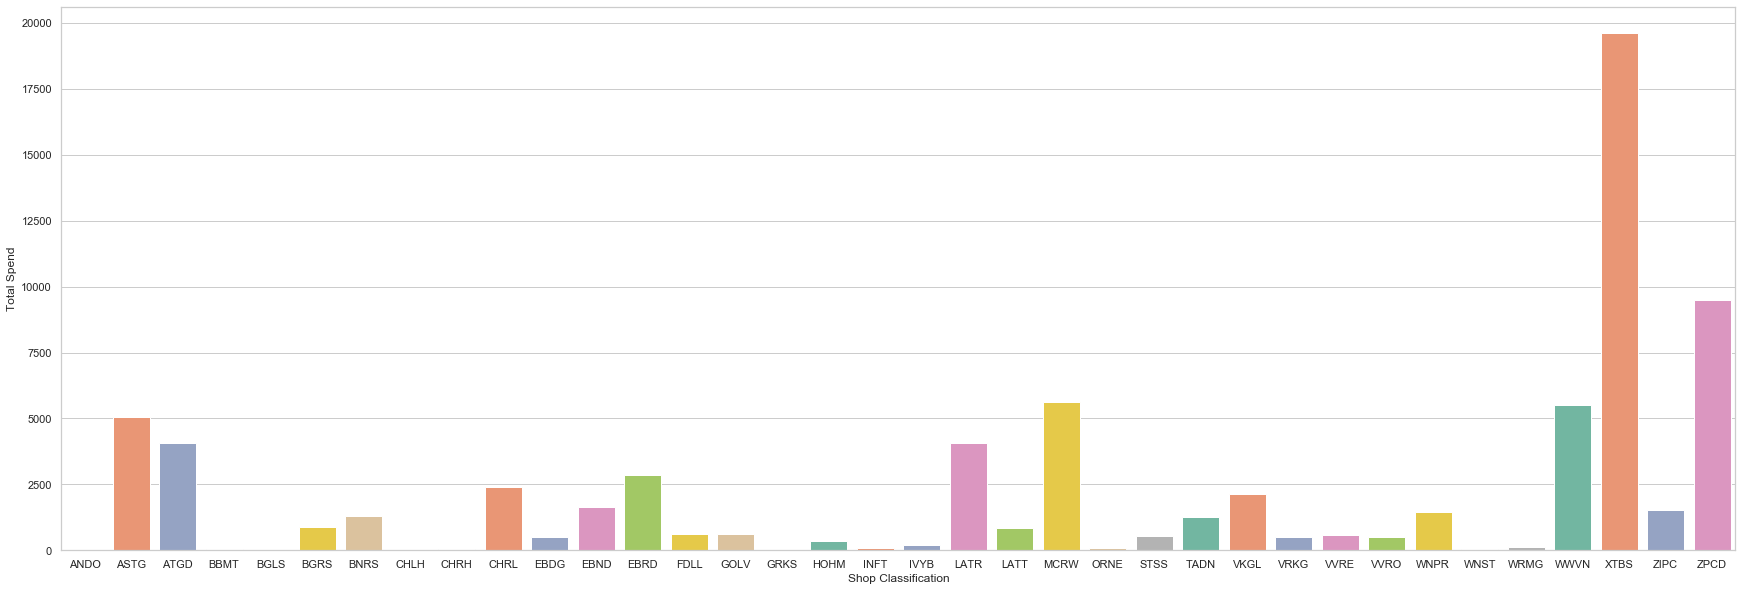

In [47]:
f, axes = plt.subplots(1,sharey=True, figsize=(30, 10))
g = sns.barplot(x='Shop Classification', y='Total Spend', data=ROAS_data_SC_spend, palette = "Set2")
sns.set(style="whitegrid")

In [48]:
ROAS_data_SC = final_data_2[['ROAS (%)','Shop Classification']].groupby(['Shop Classification']).sum().reset_index()
ROAS_data_SC.head(2)

,Shop Classification,ROAS (%)
0,ANDO,0.000000
1,ASTG,33077.749443


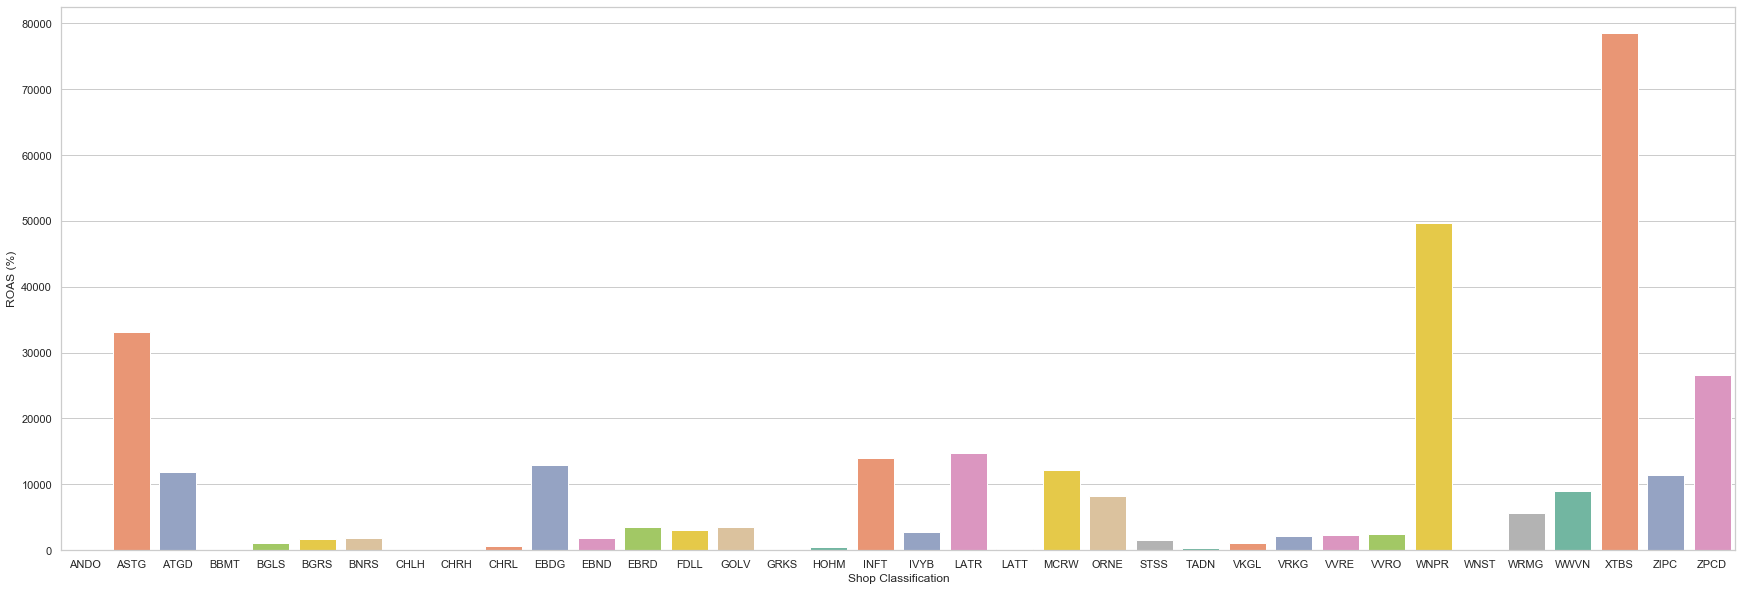

In [49]:
f, axes = plt.subplots(1,sharey=True, figsize=(30, 10))
g = sns.barplot(x='Shop Classification', y='ROAS (%)', data=ROAS_data_SC, palette = "Set2")
sns.set(style="whitegrid")

#### Categorical Data Distribution - Manufacturer Name

In [50]:
ROAS_data_MN_spend = final_data_2[['Total Spend','Manufacturer Name']].groupby(['Manufacturer Name']).sum().reset_index()
ROAS_data_MN_spend.head(2)

,Manufacturer Name,Total Spend
0,17 Stories,542.31
1,Andover Mills,3.00


[Text(0, 0, '17 Stories'),
 Text(0, 0, 'Andover Mills'),
 Text(0, 0, 'Astoria Grand'),
 Text(0, 0, 'Bloomsbury Market'),
 Text(0, 0, 'Bungalow Rose'),
 Text(0, 0, 'Charlton Home'),
 Text(0, 0, 'Ebern Designs'),
 Text(0, 0, 'Fleur De Lis Living'),
 Text(0, 0, 'Gracie Oaks'),
 Text(0, 0, 'Hashtag Home'),
 Text(0, 0, 'House of Hampton'),
 Text(0, 0, 'Ivy Bronx'),
 Text(0, 0, 'Latitude Run'),
 Text(0, 0, 'Orren Ellis'),
 Text(0, 0, 'Trent Austin Design'),
 Text(0, 0, 'Trule Teen'),
 Text(0, 0, 'Union Rustic'),
 Text(0, 0, 'Viv + Rae'),
 Text(0, 0, 'Well Woven'),
 Text(0, 0, 'Winston Porter'),
 Text(0, 0, 'World Menagerie'),
 Text(0, 0, 'Wrought Studio'),
 Text(0, 0, 'Zipcode Design')]

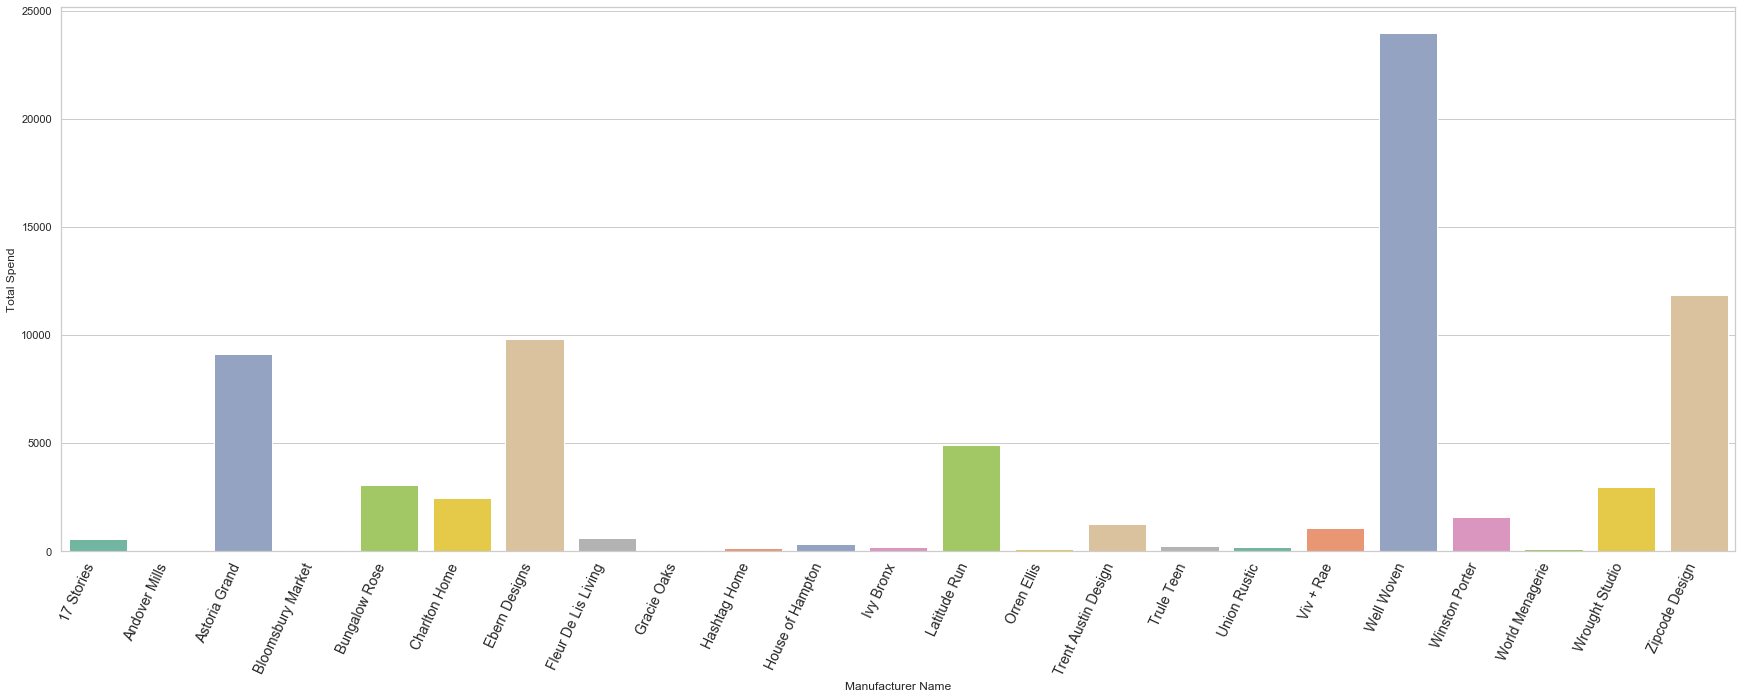

In [51]:
f, axes = plt.subplots(1,sharey=True, figsize=(30, 10))
    
axes = sns.barplot(x='Manufacturer Name', y='Total Spend', data=ROAS_data_MN_spend, palette = "Set2")
sns.set(style="whitegrid")
axes.set_xticklabels(axes.get_xticklabels(), fontsize = 14,rotation = 65,horizontalalignment='right')

In [52]:
ROAS_data_MN = final_data_2[['ROAS (%)','Manufacturer Name']].groupby('Manufacturer Name').sum().reset_index()
ROAS_data_MN.head(2)

,Manufacturer Name,ROAS (%)
0,17 Stories,1599.115266
1,Andover Mills,0.000000


[Text(0, 0, '17 Stories'),
 Text(0, 0, 'Andover Mills'),
 Text(0, 0, 'Astoria Grand'),
 Text(0, 0, 'Bloomsbury Market'),
 Text(0, 0, 'Bungalow Rose'),
 Text(0, 0, 'Charlton Home'),
 Text(0, 0, 'Ebern Designs'),
 Text(0, 0, 'Fleur De Lis Living'),
 Text(0, 0, 'Gracie Oaks'),
 Text(0, 0, 'Hashtag Home'),
 Text(0, 0, 'House of Hampton'),
 Text(0, 0, 'Ivy Bronx'),
 Text(0, 0, 'Latitude Run'),
 Text(0, 0, 'Orren Ellis'),
 Text(0, 0, 'Trent Austin Design'),
 Text(0, 0, 'Trule Teen'),
 Text(0, 0, 'Union Rustic'),
 Text(0, 0, 'Viv + Rae'),
 Text(0, 0, 'Well Woven'),
 Text(0, 0, 'Winston Porter'),
 Text(0, 0, 'World Menagerie'),
 Text(0, 0, 'Wrought Studio'),
 Text(0, 0, 'Zipcode Design')]

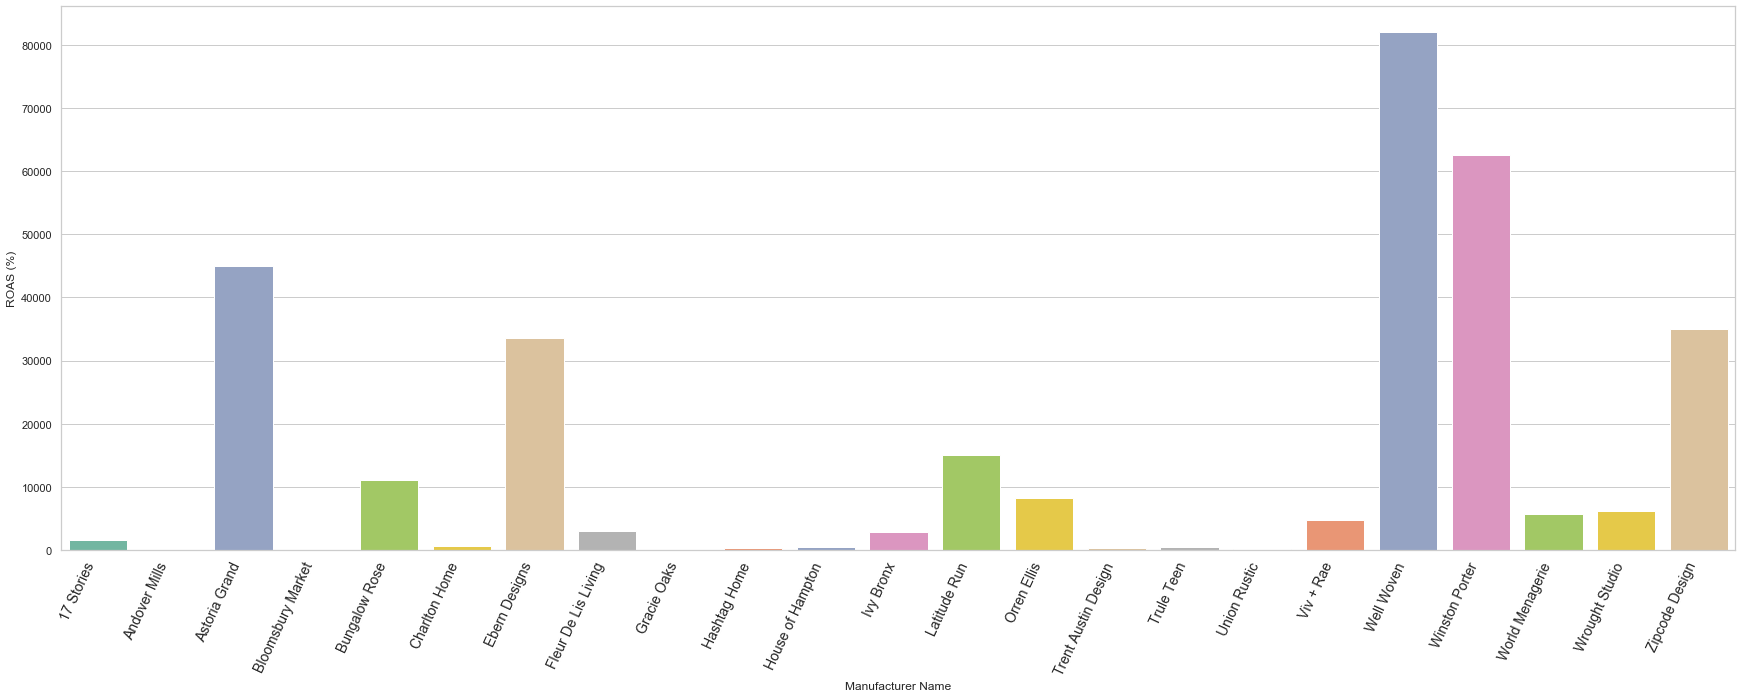

In [53]:
f, axes = plt.subplots(1,sharey=True, figsize=(30, 10))
    
axes = sns.barplot(x='Manufacturer Name', y='ROAS (%)', data=ROAS_data_MN, palette = "Set2")
sns.set(style="whitegrid")
axes.set_xticklabels(axes.get_xticklabels(), fontsize = 14,rotation = 65,horizontalalignment='right')

#### Categorical Data Distribution - Product Name

In [54]:
ROAS_data_PN_spend = final_data_2[['Total Spend','Product Name']].groupby(['Product Name']).sum().reset_index()
ROAS_data_PN_spend = ROAS_data_PN_spend.loc[ROAS_data_PN_spend['Total Spend'] != 0]
ROAS_data_PN_spend.head(2)

,Product Name,Total Spend
0,Abramowitz Blue Area Rug,22.54
1,Addieville Transitional Oriental Brown Area Rug,31.96


[Text(0, 0, 'Abramowitz Blue Area Rug'),
 Text(0, 0, 'Addieville Transitional Oriental Brown Area Rug'),
 Text(0, 0, 'Allegra Alba Tribal Natural/Red Area Rug'),
 Text(0, 0, 'Allegra Coby Tribal Crimson/Beige Area Rug'),
 Text(0, 0, 'Allegra Kathmandu Tribal Natural Area Rug'),
 Text(0, 0, 'Allegra Soliloquy Tribal Natural Area Rug'),
 Text(0, 0, 'Allentow Modern Distressed Gray Area Rug'),
 Text(0, 0, 'Allentow Modern Distressed Red/Blue/Beige Area Rug'),
 Text(0, 0, 'Allentow Modern Distressed Royal Blue Indoor Area Rug'),
 Text(0, 0, 'Allure Ari Serapi Medallion Red Area Rug'),
 Text(0, 0, 'Allure Ava Mosaic Ogee Persian Ivory Area Rug'),
 Text(0, 0, 'Allure Eden Pastel Blue Area Rug'),
 Text(0, 0, 'Allure Fiona Panel Persian Mosaic Ivory Area Rug'),
 Text(0, 0, 'Allure Sloane Paint Splash Abstract Mosaic Light Blue Area Rug'),
 Text(0, 0, 'Allure Vanessa Oriental Persian Mosaic Red Area Rug'),
 Text(0, 0, 'Angie Transitional Ombre Border Distressed Gray Area Rug'),
 Text(0, 0, 'Ara

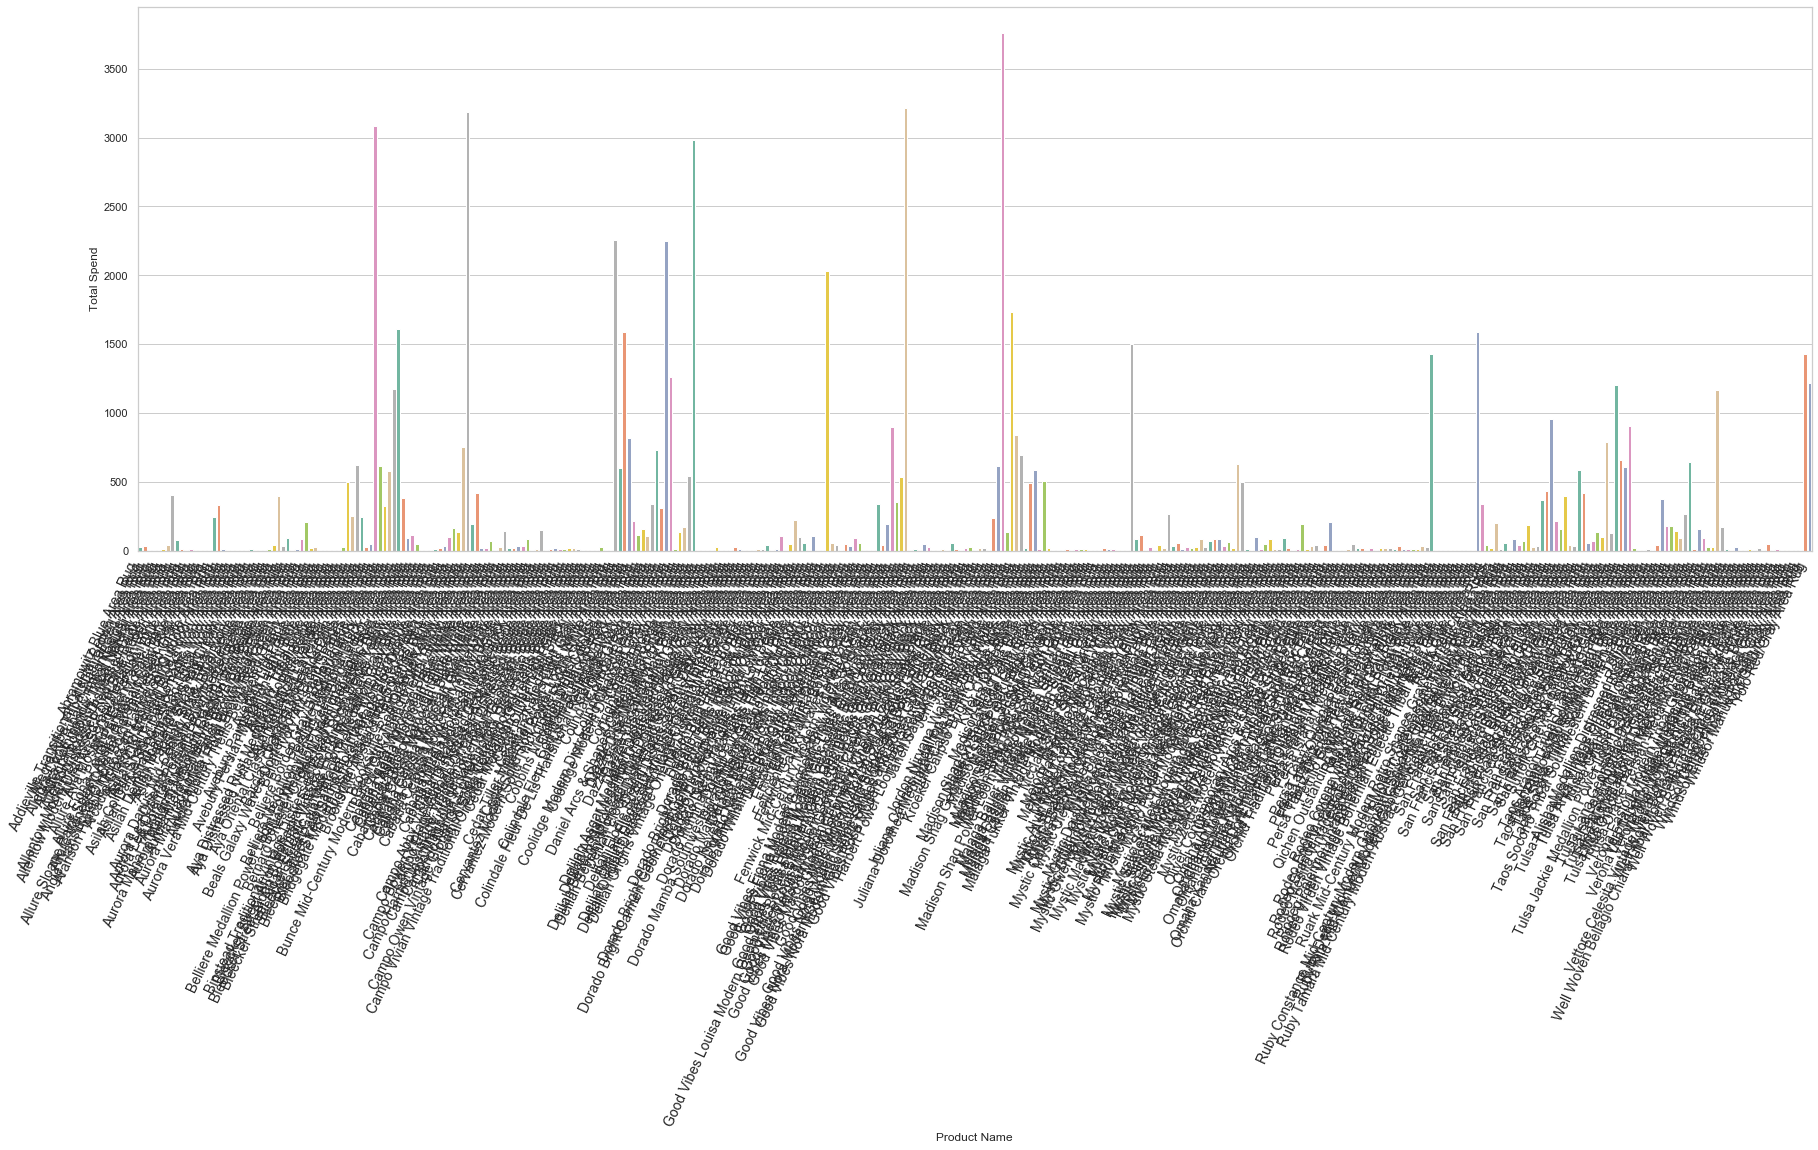

In [55]:
f, axes = plt.subplots(1,sharey=True, figsize=(30, 10))
    
axes = sns.barplot(x='Product Name', y='Total Spend', data=ROAS_data_PN_spend, palette = "Set2")
sns.set(style="whitegrid")
axes.set_xticklabels(axes.get_xticklabels(), fontsize = 14,rotation = 65,horizontalalignment='right')

#### Product data spending rank

In [56]:
ROAS_data_PN_spend_rank = ROAS_data_PN_spend
ROAS_data_PN_spend_rank['rank'] = ROAS_data_PN_spend_rank['Total Spend'].rank(ascending = True)
ROAS_data_PN_spend_rank.sort_values("Total Spend", inplace = True)
ROAS_data_PN_spend_rank.head()

,Product Name,Total Spend,rank
275,Oliver Blue/Beige Area Rug,0.35,1.0
145,Dorado Beni Trellis High-Low Blue Area Rug,0.40,2.0
183,Good Vibes Louisa Modern Geometric Boxes Blue/...,0.50,8.5
131,Delilah Asgar Medallion Distressed Beige/Gray ...,0.50,8.5
374,Verona Easton Modern Tribal Geometric Blue Are...,0.50,8.5


#### Product data ROAS rank

In [57]:
ROAS_data_PN = final_data_2[['ROAS (%)','Product Name']].groupby(['Product Name']).sum().reset_index()
ROAS_data_PN = ROAS_data_PN.loc[ROAS_data_PN['ROAS (%)'] != 0].nlargest(30,'ROAS (%)')

ROAS_data_PN_rank = ROAS_data_PN
ROAS_data_PN_rank['rank'] = ROAS_data_PN_rank['ROAS (%)'].rank(ascending = False)
ROAS_data_PN_rank.sort_values("ROAS (%)", inplace = True)

ROAS_data_PN_rank.head()

,Product Name,ROAS (%),rank
331,San Francisco Shag Blue/Yellow Area Rug,2427.146736,30.0
186,Good Vibes Margot Modern Geometric Chevron Blu...,2661.384615,29.0
234,Mcclain Shag Soft Silver Gray Area Rug,2818.970009,28.0
54,Belliere Medallion Ivory Area Rug,2857.270782,27.0
198,Janell Sarouk Border Green Area Rug,3026.230278,26.0


#### find spend rank - ROAS rank > 0

In [58]:
Product_data_rank = ROAS_data_PN_rank.merge(ROAS_data_PN_spend_rank, left_on='Product Name', right_on='Product Name', how='left')
Product_data_rank.rename(columns = {'rank_x':'ROAS_rank','rank_y':'Spending_rank'},inplace = True)
Product_data_rank['Rank_Value'] = Product_data_rank['Spending_rank'] - Product_data_rank['ROAS_rank']
Product_data_rank_final = Product_data_rank.loc[Product_data_rank['Rank_Value'] > 0]
Product_data_rank

,Product Name,ROAS (%),ROAS_rank,Total Spend,Spending_rank,Rank_Value
0,San Francisco Shag Blue/Yellow Area Rug,2427.146736,30.0,154.25,278.0,248.0
1,Good Vibes Margot Modern Geometric Chevron Blu...,2661.384615,29.0,6.50,90.5,61.5
2,Mcclain Shag Soft Silver Gray Area Rug,2818.970009,28.0,85.55,253.0,225.0
3,Belliere Medallion Ivory Area Rug,2857.270782,27.0,578.95,324.0,297.0
4,Janell Sarouk Border Green Area Rug,3026.230278,26.0,613.75,329.0,303.0
5,Belliere Medallion Persian Traditional Black A...,3461.686334,25.0,1171.09,345.0,320.0
6,Jemison Blue/Gray Area Rug,3521.702415,24.0,3761.37,363.0,339.0
7,Suffolk Chevron Black & Beige Area Rug,3539.631453,23.0,605.97,328.0,305.0
8,Melody Chantico Moroccan Gray Area Rug,3593.843594,22.0,6.01,85.0,63.0
9,Aya Oriental Classic Distressed Lavender Area Rug,4058.747528,21.0,622.12,331.0,310.0


[Text(0, 0, 'San Francisco Shag Blue/Yellow Area Rug'),
 Text(0, 0, 'Good Vibes Margot Modern Geometric Chevron Blue/Gray/Black Area Rug'),
 Text(0, 0, 'Mcclain Shag Soft Silver Gray Area Rug'),
 Text(0, 0, 'Belliere Medallion Ivory Area Rug'),
 Text(0, 0, 'Janell Sarouk Border Green Area Rug'),
 Text(0, 0, 'Belliere Medallion Persian Traditional Black Area Rug'),
 Text(0, 0, 'Jemison Blue/Gray Area Rug'),
 Text(0, 0, 'Suffolk Chevron Black & Beige Area Rug'),
 Text(0, 0, 'Melody Chantico Moroccan Gray Area Rug'),
 Text(0, 0, 'Aya Oriental Classic Distressed Lavender Area Rug'),
 Text(0, 0, 'Belliere Medallion Power Loom Polypropylene Green/Beige Indoor Area Rug'),
 Text(0, 0, 'Bellavia Blue Area Rug'),
 Text(0, 0, 'Colindale Olive Green Area Rug'),
 Text(0, 0, 'Binstead Southwestern Blue Area Rug'),
 Text(0, 0, 'Colindale Fleur De Lis Transitional Red/Beige/Ivory Area Rug'),
 Text(0, 0, 'Brooksville Multi Area Rug'),
 Text(0, 0, 'Fenwick Gray Area Rug'),
 Text(0, 0, 'Asilah Silvie Tri

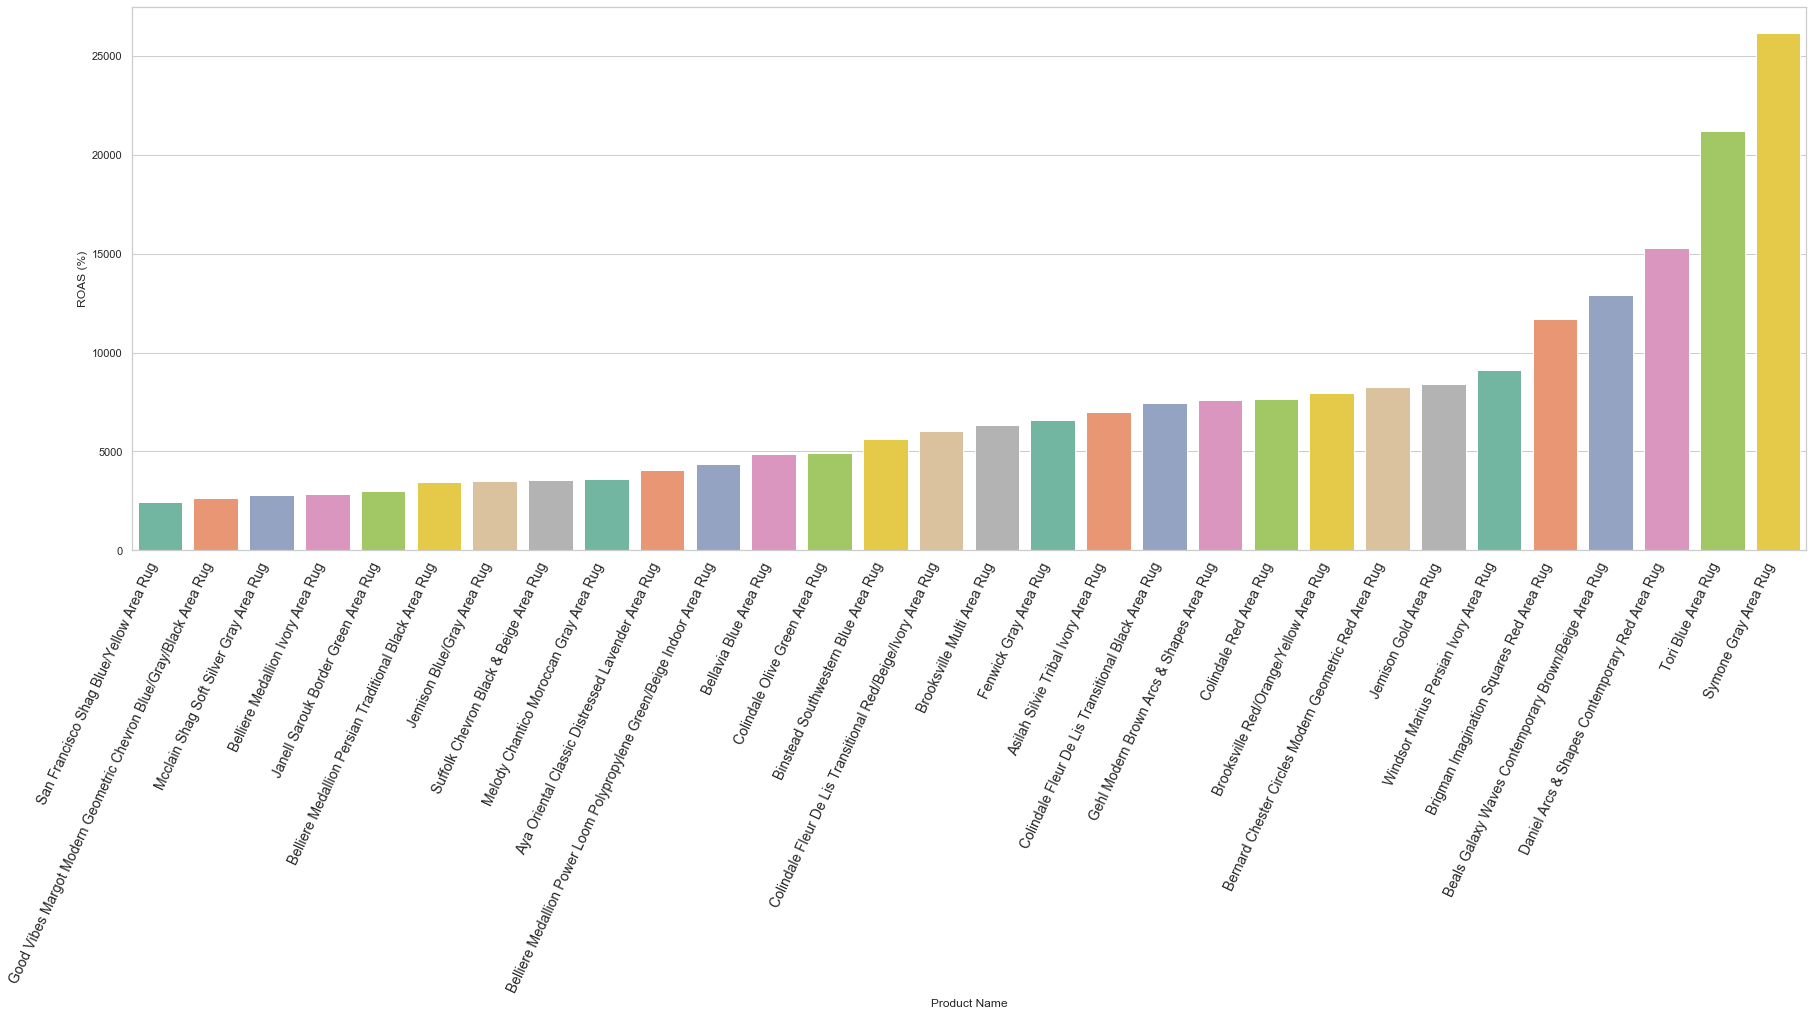

In [61]:
f, axes = plt.subplots(1,sharey=True, figsize=(30, 10))
    
axes = sns.barplot(x='Product Name', y='ROAS (%)', data=Product_data_rank_final, palette = "Set2")
sns.set(style="whitegrid")
axes.set_xticklabels(axes.get_xticklabels(), fontsize = 14,rotation = 65,horizontalalignment='right')

#### Categorical Data Distribution - Color

In [62]:
ROAS_data_spend_C = final_data_2[['Total Spend','Well Woven Color']].groupby(['Well Woven Color']).sum().reset_index()
ROAS_data_spend_C = ROAS_data_spend_C.loc[ROAS_data_spend_C['Total Spend'] != 0]
ROAS_data_spend_C.head(2)

,Well Woven Color,Total Spend
0,Anthracite,80.00
1,Beige,335.98


[Text(0, 0, 'Anthracite'),
 Text(0, 0, 'Beige'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Blue'),
 Text(0, 0, 'Blush'),
 Text(0, 0, 'Blush Pink'),
 Text(0, 0, 'Brick'),
 Text(0, 0, 'Brown'),
 Text(0, 0, 'Burnt Orange'),
 Text(0, 0, 'Copper'),
 Text(0, 0, 'Cream'),
 Text(0, 0, 'Cream/Grey'),
 Text(0, 0, 'Crimson'),
 Text(0, 0, 'Dark Blue'),
 Text(0, 0, 'Dark Gray'),
 Text(0, 0, 'Dark Grey'),
 Text(0, 0, 'Earth'),
 Text(0, 0, 'Gold'),
 Text(0, 0, 'Green'),
 Text(0, 0, 'Grey'),
 Text(0, 0, 'Grey & Red'),
 Text(0, 0, 'Grey - Black'),
 Text(0, 0, 'Indigo'),
 Text(0, 0, 'Ivory'),
 Text(0, 0, 'Lavendar'),
 Text(0, 0, 'Lavender'),
 Text(0, 0, 'Light Blue'),
 Text(0, 0, 'Light Grey'),
 Text(0, 0, 'Light blue '),
 Text(0, 0, 'Multi'),
 Text(0, 0, 'Multi Blue'),
 Text(0, 0, 'Mutli'),
 Text(0, 0, 'Narural'),
 Text(0, 0, 'Natural'),
 Text(0, 0, 'Orange'),
 Text(0, 0, 'Pink'),
 Text(0, 0, 'Purple'),
 Text(0, 0, 'Red'),
 Text(0, 0, 'Red Grey'),
 Text(0, 0, 'Royal Blue'),
 Text(0, 0, 'Rust'),
 Text(0, 0, 'S

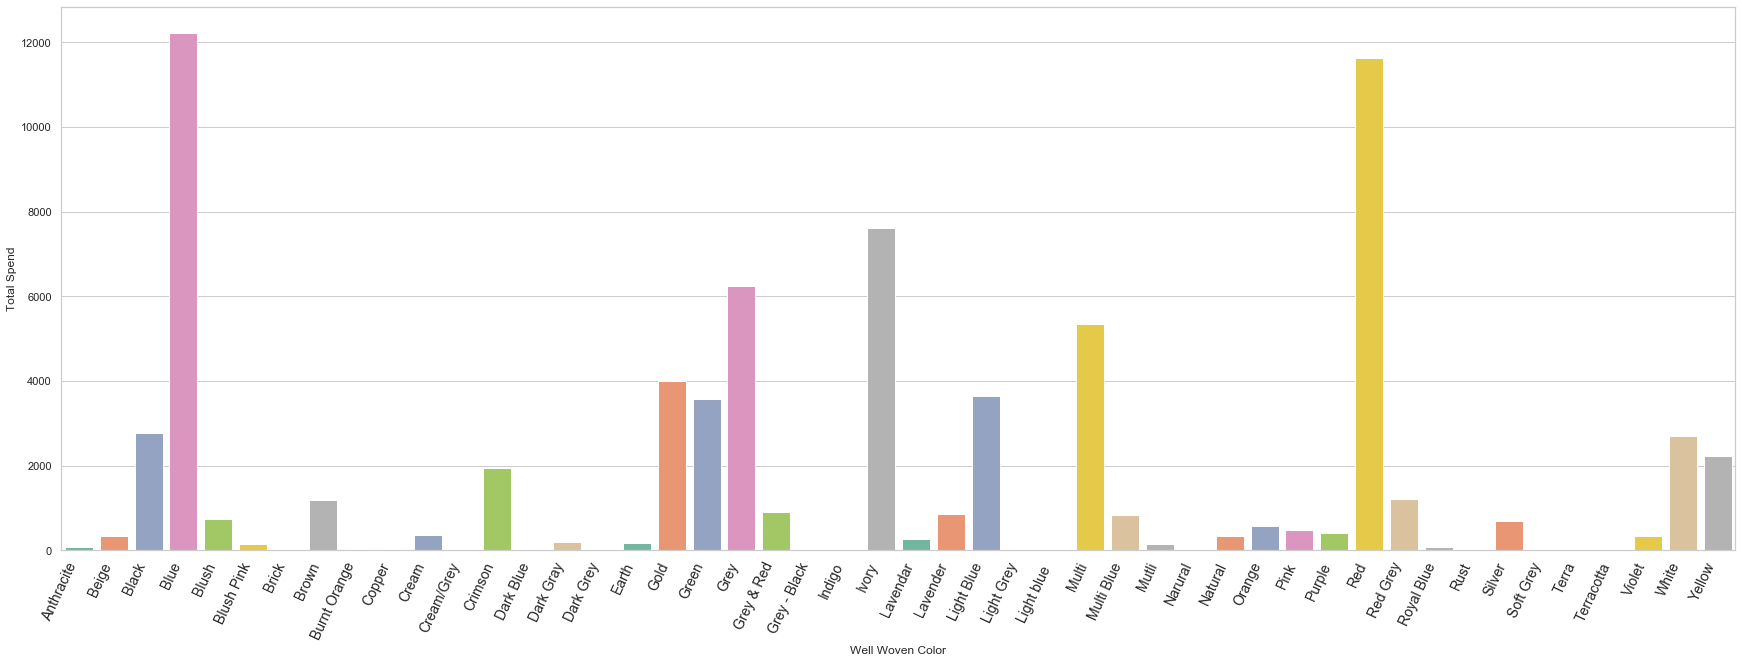

In [63]:
f, axes = plt.subplots(1,sharey=True, figsize=(30, 10))
    
axes = sns.barplot(x='Well Woven Color', y='Total Spend', data=ROAS_data_spend_C, palette = "Set2")
sns.set(style="whitegrid")
axes.set_xticklabels(axes.get_xticklabels(), fontsize = 14,rotation = 65,horizontalalignment='right')

In [64]:
ROAS_data_C = final_data_2[['ROAS (%)','Well Woven Color']].groupby(['Well Woven Color']).sum().reset_index()
ROAS_data_C = ROAS_data_C.loc[ROAS_data_C['ROAS (%)'] != 0]
ROAS_data_C.head(2)

,Well Woven Color,ROAS (%)
1,Beige,4111.968601
2,Black,21317.221910


[Text(0, 0, 'Beige'),
 Text(0, 0, 'Black'),
 Text(0, 0, 'Blue'),
 Text(0, 0, 'Blush'),
 Text(0, 0, 'Blush Pink'),
 Text(0, 0, 'Brown'),
 Text(0, 0, 'Cream'),
 Text(0, 0, 'Crimson'),
 Text(0, 0, 'Dark Gray'),
 Text(0, 0, 'Earth'),
 Text(0, 0, 'Gold'),
 Text(0, 0, 'Green'),
 Text(0, 0, 'Grey'),
 Text(0, 0, 'Grey & Red'),
 Text(0, 0, 'Ivory'),
 Text(0, 0, 'Lavendar'),
 Text(0, 0, 'Lavender'),
 Text(0, 0, 'Light Blue'),
 Text(0, 0, 'Light Grey'),
 Text(0, 0, 'Multi'),
 Text(0, 0, 'Multi Blue'),
 Text(0, 0, 'Mutli'),
 Text(0, 0, 'Natural'),
 Text(0, 0, 'Orange'),
 Text(0, 0, 'Pink'),
 Text(0, 0, 'Purple'),
 Text(0, 0, 'Red'),
 Text(0, 0, 'Red Grey'),
 Text(0, 0, 'Royal Blue'),
 Text(0, 0, 'Silver'),
 Text(0, 0, 'Terra'),
 Text(0, 0, 'Violet'),
 Text(0, 0, 'White'),
 Text(0, 0, 'Yellow')]

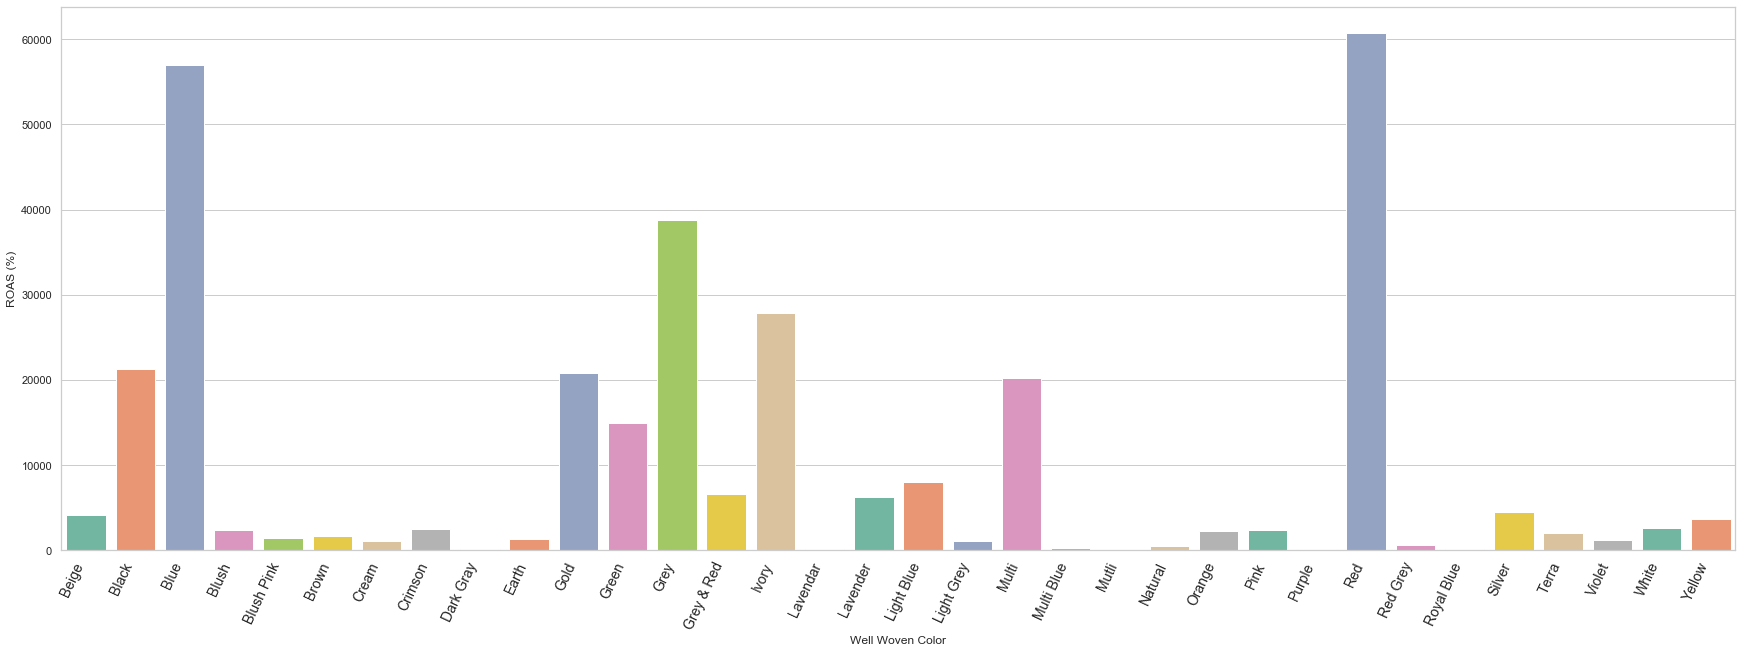

In [65]:
f, axes = plt.subplots(1,sharey=True, figsize=(30, 10))
    
axes = sns.barplot(x='Well Woven Color', y='ROAS (%)', data=ROAS_data_C, palette = "Set2")
sns.set(style="whitegrid")
axes.set_xticklabels(axes.get_xticklabels(), fontsize = 14,rotation = 65,horizontalalignment='right')

#### Categorical Data Distribution - Collection

In [66]:
ROAS_data_CO_spend = final_data_2[['Total Spend','Collection Name']].groupby('Collection Name').sum().reset_index()
ROAS_data_CO_spend = ROAS_data_CO_spend.loc[ROAS_data_CO_spend['Total Spend'] != 0]
ROAS_data_CO_spend.head(2)

,Collection Name,Total Spend
0,Abramowitz,22.54
1,Addieville,31.96


[Text(0, 0, 'Abramowitz'),
 Text(0, 0, 'Addieville'),
 Text(0, 0, 'Allegra'),
 Text(0, 0, 'Allentow'),
 Text(0, 0, 'Allure'),
 Text(0, 0, 'Aranson'),
 Text(0, 0, 'Arcadia'),
 Text(0, 0, 'Ash'),
 Text(0, 0, 'Asilah'),
 Text(0, 0, 'Aurora'),
 Text(0, 0, 'Avebury'),
 Text(0, 0, 'Aya'),
 Text(0, 0, 'Barajas'),
 Text(0, 0, 'Barclay'),
 Text(0, 0, 'Beals'),
 Text(0, 0, 'Bellair'),
 Text(0, 0, 'Bellavia'),
 Text(0, 0, 'Belliere'),
 Text(0, 0, 'Bernard'),
 Text(0, 0, 'Binstead'),
 Text(0, 0, 'Bleecker Street'),
 Text(0, 0, 'Bridgegate'),
 Text(0, 0, 'Brigman'),
 Text(0, 0, 'Brooksville'),
 Text(0, 0, 'Bunce'),
 Text(0, 0, 'Burley Oak'),
 Text(0, 0, 'Cabana'),
 Text(0, 0, 'Campo'),
 Text(0, 0, 'Cedar'),
 Text(0, 0, 'Cervantez'),
 Text(0, 0, 'Chelsi'),
 Text(0, 0, 'Cobbins'),
 Text(0, 0, 'Colindale'),
 Text(0, 0, 'Coolidge'),
 Text(0, 0, 'Coppola'),
 Text(0, 0, 'Cortright'),
 Text(0, 0, 'Costello'),
 Text(0, 0, 'Daniel'),
 Text(0, 0, 'Dazzle'),
 Text(0, 0, 'Delilah'),
 Text(0, 0, 'Devon'),
 Text

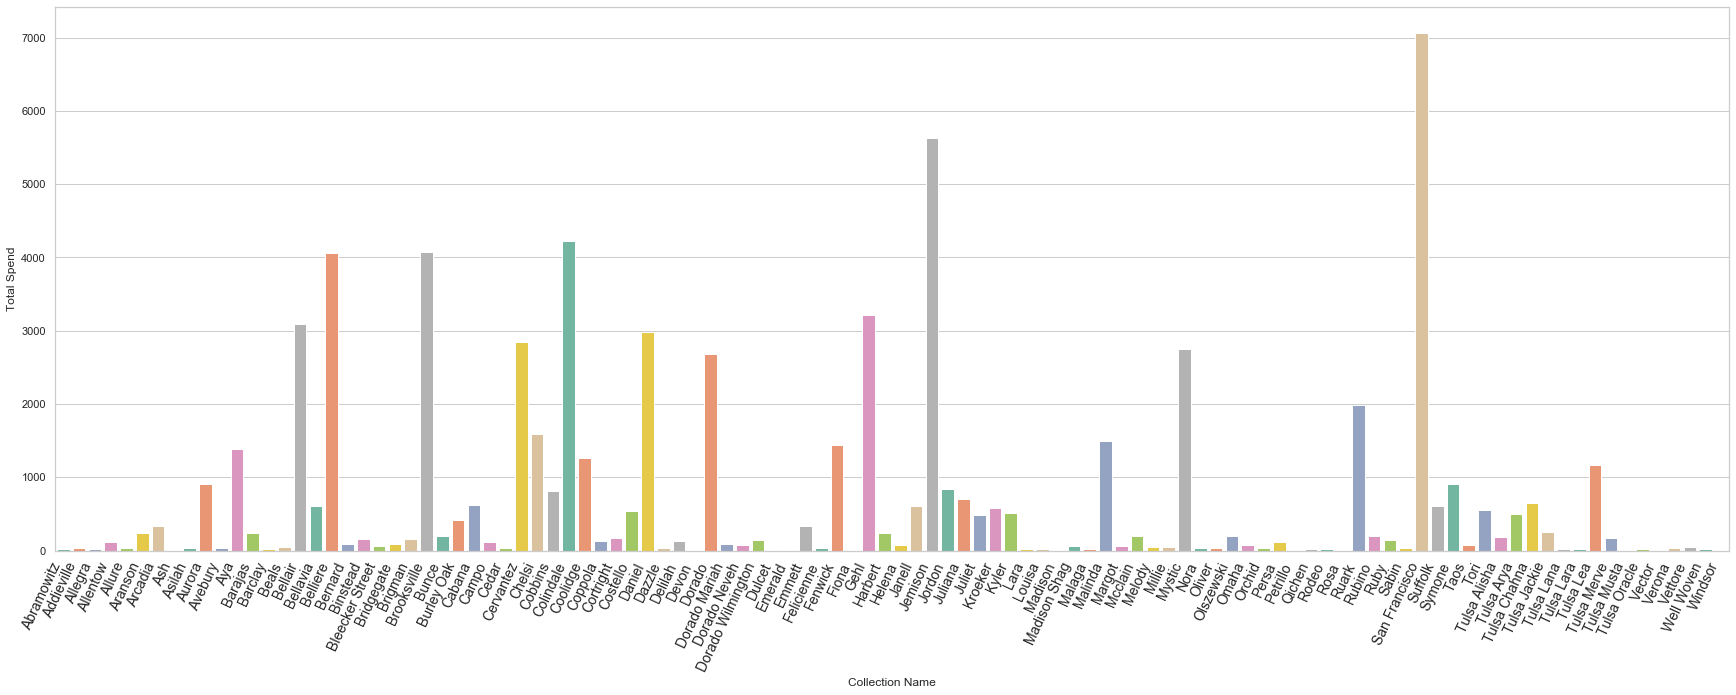

In [67]:
f, axes = plt.subplots(1,sharey=True, figsize=(30, 10))
    
axes = sns.barplot(x='Collection Name', y='Total Spend', data=ROAS_data_CO_spend, palette = "Set2")
sns.set(style="whitegrid")
axes.set_xticklabels(axes.get_xticklabels(), fontsize = 14,rotation = 65,horizontalalignment='right')

In [68]:
ROAS_data_CO = final_data_2[['ROAS (%)','Collection Name']].groupby(['Collection Name']).sum().reset_index()
ROAS_data_CO = ROAS_data_CO.loc[ROAS_data_CO['ROAS (%)'] != 0]
ROAS_data_CO.head(2)

,Collection Name,ROAS (%)
3,Allentow,797.664794
5,Aranson,395.951892


[Text(0, 0, 'Allentow'),
 Text(0, 0, 'Aranson'),
 Text(0, 0, 'Arcadia'),
 Text(0, 0, 'Ash'),
 Text(0, 0, 'Asilah'),
 Text(0, 0, 'Aurora'),
 Text(0, 0, 'Avebury'),
 Text(0, 0, 'Aya'),
 Text(0, 0, 'Barajas'),
 Text(0, 0, 'Barclay'),
 Text(0, 0, 'Beals'),
 Text(0, 0, 'Bellair'),
 Text(0, 0, 'Bellavia'),
 Text(0, 0, 'Belliere'),
 Text(0, 0, 'Bernard'),
 Text(0, 0, 'Binstead'),
 Text(0, 0, 'Bleecker Street'),
 Text(0, 0, 'Bridgegate'),
 Text(0, 0, 'Brigman'),
 Text(0, 0, 'Brooksville'),
 Text(0, 0, 'Bunce'),
 Text(0, 0, 'Burley Oak'),
 Text(0, 0, 'Cabana'),
 Text(0, 0, 'Campo'),
 Text(0, 0, 'Cervantez'),
 Text(0, 0, 'Chelsi'),
 Text(0, 0, 'Cobbins'),
 Text(0, 0, 'Colindale'),
 Text(0, 0, 'Coolidge'),
 Text(0, 0, 'Coppola'),
 Text(0, 0, 'Cortright'),
 Text(0, 0, 'Costello'),
 Text(0, 0, 'Daniel'),
 Text(0, 0, 'Dazzle'),
 Text(0, 0, 'Dorado'),
 Text(0, 0, 'Dorado Wilmington'),
 Text(0, 0, 'Emmett'),
 Text(0, 0, 'Fenwick'),
 Text(0, 0, 'Fiona'),
 Text(0, 0, 'Gehl'),
 Text(0, 0, 'Harbert'),
 Te

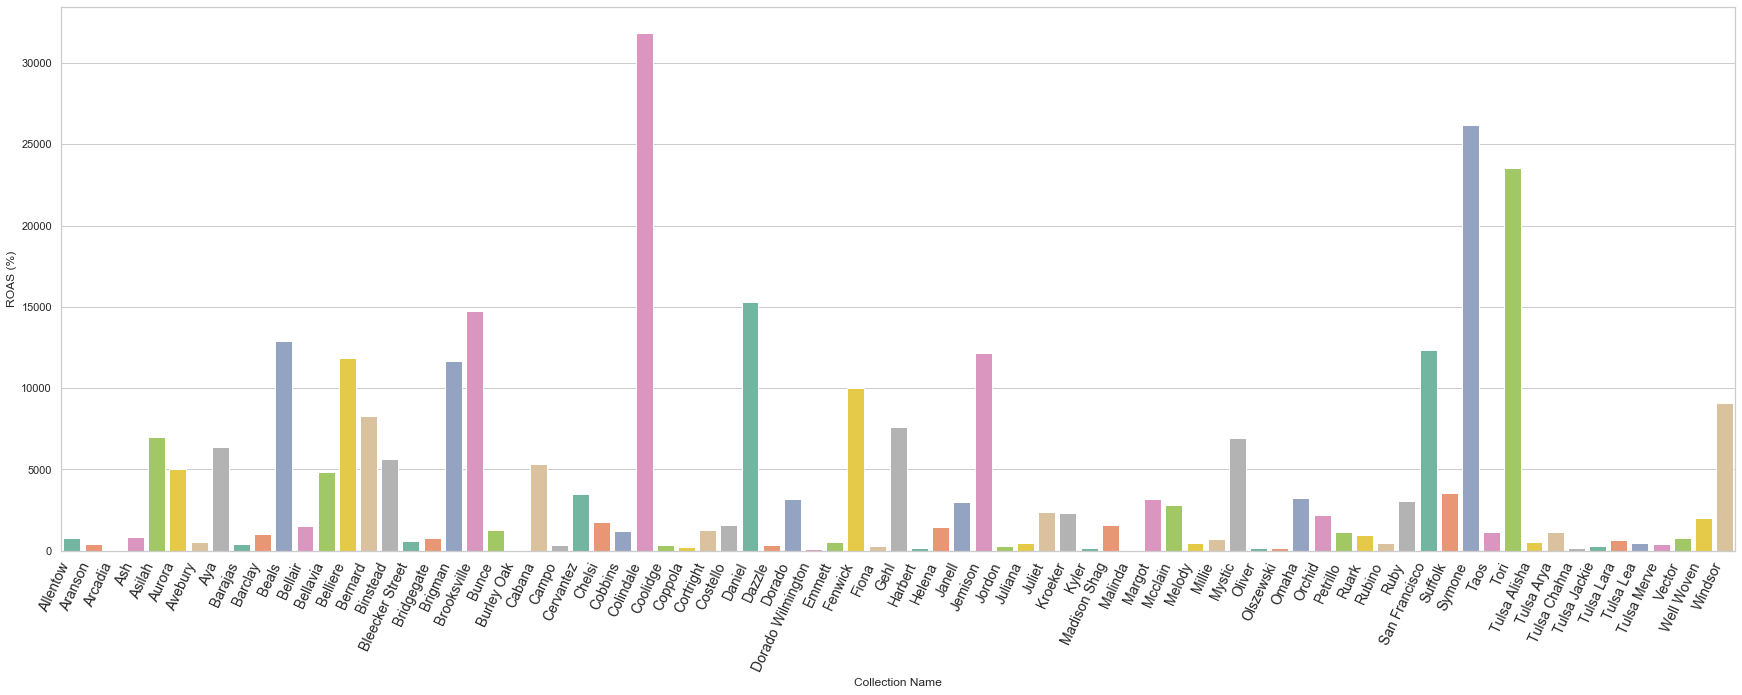

In [69]:
f, axes = plt.subplots(1,sharey=True, figsize=(30, 10))
    
axes = sns.barplot(x='Collection Name', y='ROAS (%)', data=ROAS_data_CO, palette = "Set2")
sns.set(style="whitegrid")
axes.set_xticklabels(axes.get_xticklabels(), fontsize = 14,rotation = 65,horizontalalignment='right')

## Campaign performance

#### Campaign Return

In [70]:
Campaign_ID_ROAS = final_data_2[['Campaign ID','ROAS (%)']]
Campaign_ID_ROAS = Campaign_ID_ROAS.groupby('Campaign ID').mean().reset_index()

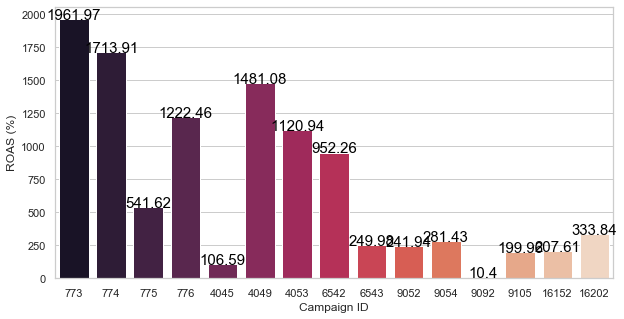

In [71]:
f, axes = plt.subplots(1,sharey=True, figsize=(10, 5))
g= sns.barplot(x='Campaign ID', y='ROAS (%)', data=Campaign_ID_ROAS,palette="rocket")
sns.set(style="whitegrid")
for index, row in Campaign_ID_ROAS.iterrows():
    g.text(row.name,row['ROAS (%)'], round(row['ROAS (%)'],2), color='black', ha="center",fontsize=15)

#### Attribute Sales

In [72]:
Campaign_ID_TS = final_data_2[['Campaign ID','Attributed Sales']]
Campaign_ID_TS = Campaign_ID_TS.groupby('Campaign ID').mean().reset_index()
Campaign_ID_TS

,Campaign ID,Attributed Sales
0,773,267.170000
1,774,264.743333
2,775,78.805000
3,776,135.384000
4,4045,15.640822
5,4049,77.621200
6,4053,125.927200
7,6542,86.602609
8,6543,73.552200
9,9052,1021.101915


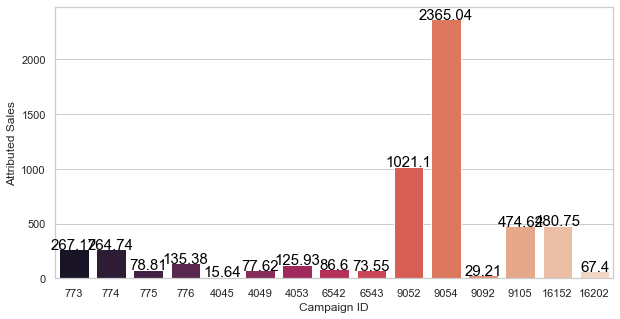

In [73]:
f, axes = plt.subplots(1,sharey=True, figsize=(10, 5))
g= sns.barplot(x='Campaign ID', y='Attributed Sales', data=Campaign_ID_TS,palette="rocket")
sns.set(style="whitegrid")
for index, row in Campaign_ID_TS.iterrows():
    g.text(row.name,row['Attributed Sales'], round(row['Attributed Sales'],2), color='black', ha="center",fontsize=15)

#### Total Spend

In [74]:
Campaign_ID_TS = final_data_2[['Campaign ID','Total Spend']]
Campaign_ID_TS = Campaign_ID_TS.groupby('Campaign ID').mean().reset_index()
Campaign_ID_TS

,Campaign ID,Total Spend
0,773,14.966000
1,774,8.695000
2,775,8.510000
3,776,13.750000
4,4045,10.358630
5,4049,7.521800
6,4053,8.974200
7,6542,10.762609
8,6543,9.529200
9,9052,362.291489


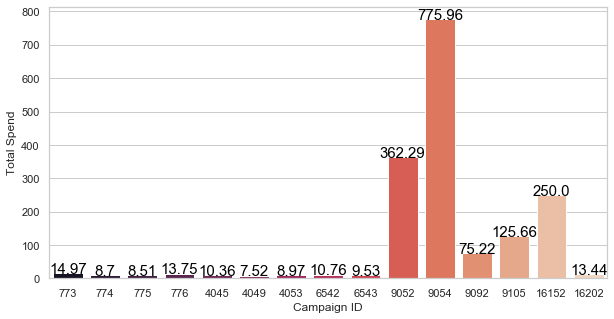

In [75]:
f, axes = plt.subplots(1,sharey=True, figsize=(10, 5))
g= sns.barplot(x='Campaign ID', y='Total Spend', data=Campaign_ID_TS,palette="rocket")
sns.set(style="whitegrid")
for index, row in Campaign_ID_TS.iterrows():
    g.text(row.name,row['Total Spend'], round(row['Total Spend'],2), color='black', ha="center",fontsize=15)

## Date type data analytics

#### Campaign Period Analytics

In [76]:
Period_Average_spend = final_data_2[['ROAS (%)','Period_Week']].groupby('Period_Week').mean().reset_index()
Period_Average_spend.rename(columns = {'ROAS (%)':'Average ROAS (%)'}, inplace = True)
Period_Average_spend.head(2)

,Period_Week,Average ROAS (%)
0,1,207.613488
1,4,797.007675


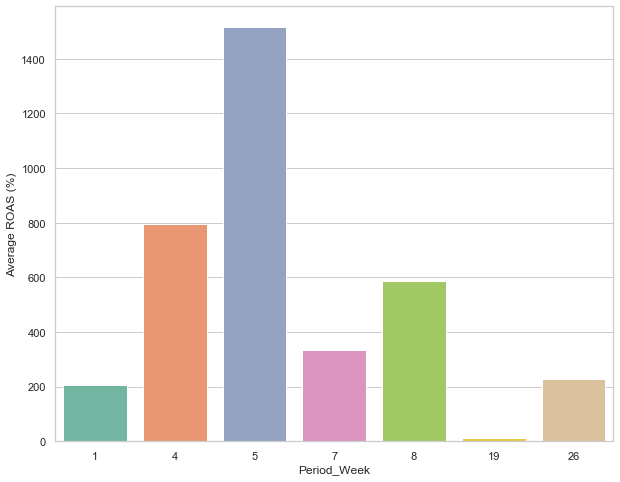

In [77]:
f, axes = plt.subplots(1,sharey=True, figsize=(10, 8))
g = sns.barplot(x='Period_Week', y='Average ROAS (%)', data = Period_Average_spend, palette = "Set2")
sns.set(style="whitegrid")

In [78]:
Period_Average_count = final_data_2[['Total Spend','Period_Week']]
Period_Average_count = Period_Average_count.groupby('Period_Week').count().reset_index().rename(columns = {'Total Spend':'Count'})
Period_Average_count

,Period_Week,Count
0,1,10
1,4,173
2,5,18
3,7,146
4,8,96
5,19,23
6,26,204


In [79]:
Campaign_count = final_data_2[['Period_Week','Campaign ID']].drop_duplicates()
Campaign_count = Campaign_count.groupby('Period_Week').count().reset_index().rename(columns = {"Campaign ID":'Count'})

In [80]:
Campaign_count

,Period_Week,Count
0,1,1
1,4,3
2,5,4
3,7,1
4,8,2
5,19,1
6,26,3


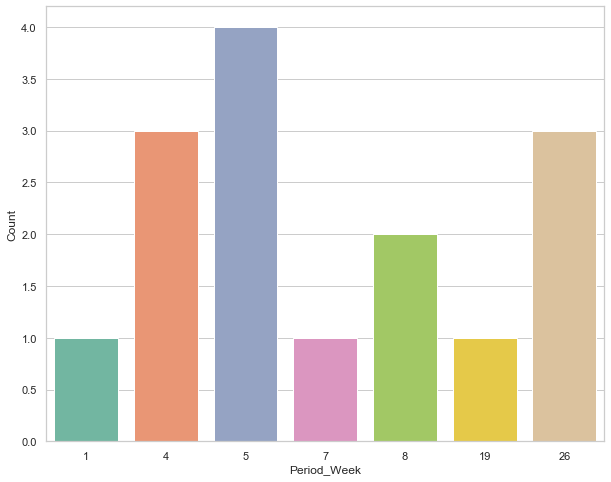

In [81]:
f, axes = plt.subplots(1,sharey=True, figsize=(10, 8))
g = sns.barplot(x='Period_Week', y='Count', data = Campaign_count, palette = "Set2")
sns.set(style="whitegrid")

#### Campaign Date Analytics

In [82]:
Month_Average_spend = final_data_2[['ROAS (%)','Start_Month']].groupby('Start_Month').mean().reset_index()
Month_Average_spend.rename(columns = {'ROAS (%)':'Average ROAS (%)'}, inplace = True)
Month_Average_spend.head(2)

,Start_Month,Average ROAS (%)
0,Apr,205.598109
1,Aug,325.752953


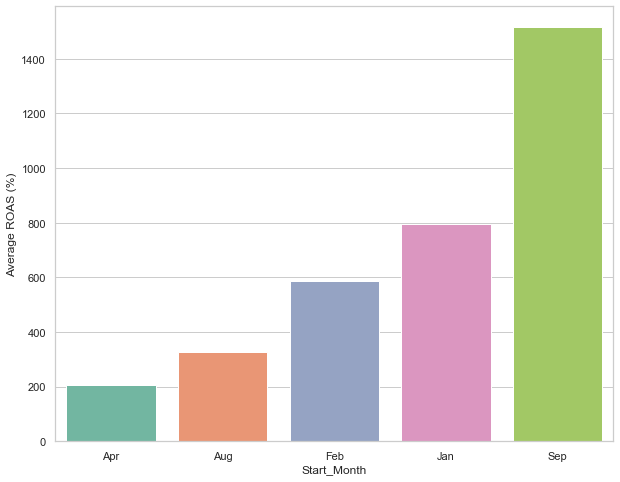

In [83]:
f, axes = plt.subplots(1,sharey=True, figsize=(10, 8))
g = sns.barplot(x='Start_Month', y='Average ROAS (%)', data = Month_Average_spend, palette = "Set2")
sns.set(style="whitegrid")

In [84]:
Month_Average_count = final_data_2[['Start_Month','Campaign ID']].drop_duplicates()
Month_Average_count = Month_Average_count.groupby('Start_Month').count().reset_index().rename(columns = {"Campaign ID":'Count'})

In [85]:
Month_Average_count 

,Start_Month,Count
0,Apr,4
1,Aug,2
2,Feb,2
3,Jan,3
4,Sep,4


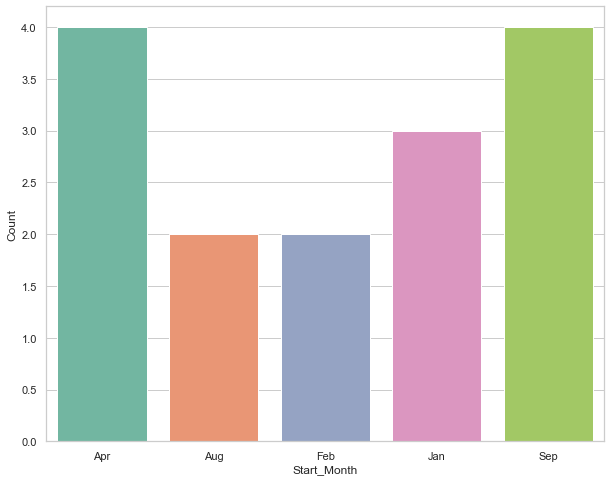

In [86]:
f, axes = plt.subplots(1,sharey=True, figsize=(10, 8))
g = sns.barplot(x='Start_Month', y='Count', data = Month_Average_count, palette = "Set2")
sns.set(style="whitegrid")

In [87]:
bubble_chart_data = final_data_2[['Campaign ID','Start_Month','Period_Week','ROAS (%)']]
bubble_chart_data_2 = bubble_chart_data.groupby('Campaign ID').mean().reset_index()

In [88]:
result = pd.merge(bubble_chart_data_2,
                 bubble_chart_data[['Start_Month','Campaign ID']],
                  on = 'Campaign ID').sort_values(by=['Start_Month'],ascending=True)
result = result.drop_duplicates()

In [89]:
result

,Campaign ID,Period_Week,ROAS (%),Start_Month
334,9054,26,281.429871,Apr
410,9105,26,199.964206,Apr
386,9092,19,10.400457,Apr
333,9052,26,241.940956,Apr
618,16202,7,333.844697,Aug
514,16152,1,207.613488,Aug
286,6543,8,249.976998,Feb
216,6542,8,952.256741,Feb
64,4045,4,106.591916,Jan
91,4049,4,1481.082288,Jan


In [90]:
# prepare dataset for the bubble chart
x = result['Start_Month']
y = result['ROAS (%)']
colors = result['Campaign ID']
sz = result['Period_Week']

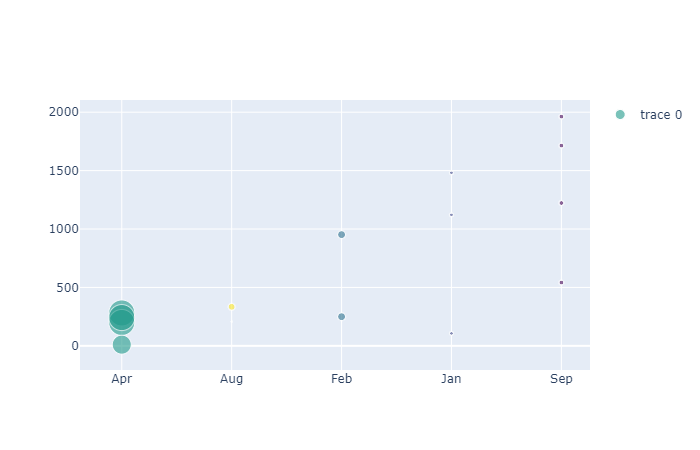

In [91]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=x,
    y=y,
    mode="markers",
    marker=go.scatter.Marker(
        size=sz,
        color=colors,
        opacity=0.6,
        colorscale="Viridis"
    )
))
fig.update_layout(showlegend=True)
fig.show(renderer="png")


In [92]:
result.to_excel ('bubble_chart.xlsx', index = None, header=True)

#### in september, which color should invest more

In [93]:
'Campaign ID',
 'Wayfair SKU',
 'Shop Classification',
 'Product Name_x',
 'Manufacturer Name',
 'Collection Name',
 'Primary Pattern',
 'Well Woven Color',
 'Start Date',
 'End Date',
 'Start_Month',
 'Period_Week',
 'Impressions',
 'Clicks',
 'Avg. Daily Spend',
 'Attributed Sales',
 'Attributed Orders',
 'ROAS (%)',
 'CPC',
 'CTR (%)',
 'Total Spend']]

IndentationError: unexpected indent (<ipython-input-93-2c3f61ad8c56>, line 2)

In [ ]:
september_color = final_data_2[['Start_Month','Well Woven Color','ROAS (%)']]

In [ ]:
september_color.loc[september_color['Start_Month'] == 'Sep'].groupby('Well Woven Color').mean().reset_index()

In [ ]:
f, axes = plt.subplots(1,sharey=True, figsize=(10, 8))
g = sns.barplot(x='Well Woven Color', y='ROAS (%)', data =september_color.loc[september_color['Start_Month'] == 'Sep'], palette = "Set2")
sns.set(style="whitegrid")

## Funnel Analytics

In [104]:
impression = final_data_2['Impressions'].loc[final_data_2['Impressions'] != 0].count()
click = final_data_2['Clicks'].loc[final_data_2['Clicks'] != 0].count()
sale = final_data_2['Attributed Orders'].loc[final_data_2['Attributed Orders'] != 0].count()

In [108]:
impression

658

In [109]:
click

611

In [110]:
sale

260

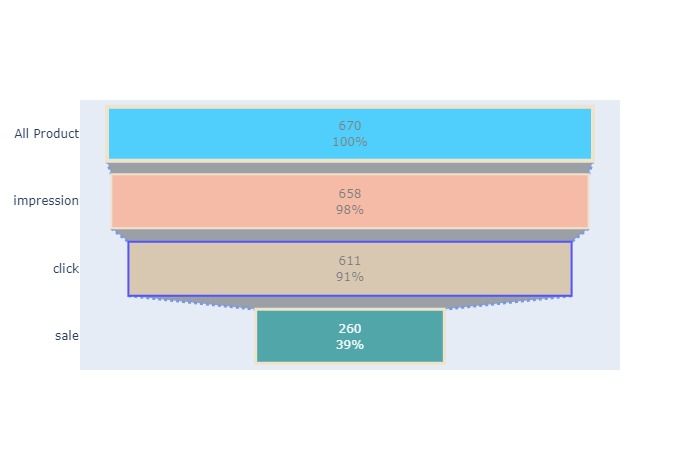

In [116]:
fig = go.Figure(go.Funnel(
    y = ["All Product","impression", "click", "sale"],
    x = [670, impression, click, sale],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )

fig.show(renderer="jpeg")
